In [1]:
!pip install skimpy
!pip install phik

# Анализ оттока клиентов регионального банка «Метанпром»

## Описание проекта

Отделу маркетинга банка «Метанпромбанк» в срочном требуется аналитик с уверенным владением «Python». Главной задачей проекта станет анализ оттока клиентов. Анализ покажет, как клиенты пользуются услугами банка, а так же поможет нам составить портрет клиентов, которые склонны уходить из банка.

Привлекать новых клиентов дорого, дешевле удержать тех, про которых мы уже что-то знаем. В нашем отделе маркетинга нету автоматизированных систем рассылок, письма каждому клиенту пишутся вручную, поэтому нам важно для отдела маркетинга представить компактные однородные сегменты и дать примеры мероприятий, которые можно провести, чтобы вернуть клиентов в банк или удержать сомневающихся от оттока.

Ранее проводилось подобное исследование и по нему был составлен дашборд, но он устарел и по нему сейчас не ясно, в чём сейчас заключается проблема и как её можно решать. Состав клиентов банка изменился и старые сегменты больше не подходят.

Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

**Цель проекта:** проанализировать отток клиентов банка и максимально эффективно определить сегменты клиентов, в которых происходит наибольший отток с целью разработки маркетинговых мер по их удержанию, которые позволят покрыть максимум проблемных зон банка.

Под *максимальной эффективностью* понимается определение категорий клиентов таким образом, чтобы они соответствовали следующим критериям:
* сегмент должен быть *однородным*, т. е. потребители должны одинаково реагировать на маркетинговые мероприятия;
* сегмент должен быть *высокоотточным*, т.е. в сегменте должно наблюдаться значительное количество/доля высокоотточных клиентов и не должен наблюдаться "эффект малых чисел".

*Результатом исследования* должно послужить целевое воздействие на выделенные сегменты, которое позвонит снизить отток клиентов и, как следствие, увеличить целевые показатели банка.

**Задачи исследования:**
* изучение представленных данных для анализа;
* исследовательский анализ данных на предмет распределения клиентов в т.ч. в разрезе оттока, составление портретов клиентов и их сравнение;
* корреляционный анализ с целью определения наличия зависимости между переменными и насколько она сильна;
* проверка статистических гипотез;
* формулировка предварительных выводов о том, какие показатели стратегически влияют на отток;
* сегментация клиентов и выявление крупных, но компактных высокоотточных сегментов;
* разработка метрики для приоритизации сегментов;
* сформулировать выводы и план мероприятий для менеджера отдела маркетинга по воздействию на приоритетные сегменты высокоотточных клиентов.

**План проекта:**

1. Загрузка данных, получение общей информации, будет рассмотрено в рамках раздела:
    * структура представленных данных,
    * размер датафрейма,
    * корректность названия столбцов,
    * проверка на наличие пропусков,
    * анализ типов данных в датафрейме,
    * проверка на дубликаты в датафрейме,
    * вывод по разделу.

2. Подготовка данных к анализу, в данном разделе будет выполнено:
    * кодирование данных (переменные пол, город);
    * анализ пропущенных значений и их обработка (при необходимости);
    * вывод по разделу.

3. Исследовательский анализ данных. Анализ будет проводиться не только в рамках переменных (столбцов), но так же и в разрезе городов, т.к. зачастую регион проживания сказывается на уровне жизни населения и его поведения.

    3.1. Анализ распределения клиентов (в т.ч. в разрезе оттока)
    
    3.2. Составление портретов клиентов и их сравнение с целью выявления особенностей поведения.
    
    3.3. Корреляционный анализ.
    
    3.4. Вывод по разделу.
    
4. Проверка статистических гипотез:

    4.1. Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались.
    
    4.2. Проверка гипотезы различия скоррингового балла между отточными и не отточными клиентами.
    
5. Промежуточный итог: анализ ранее полученных данных и выявление стратегически важных показателей, которые влияют на отток.

6. Сегментация клиентов на основе стратегических показателей и выявление крупных, но компактных высокоотточных сегментов.

7. Выводы по проведенному исследование и составление план мероприятий для заказчика.

8. Подготовка презентации и дашборда для заказчика.

**Ссылка на презентацию**: https://disk.yandex.ru/i/CoZLSigt5mTvRA

**Ссылка на дашборд**: https://public.tableau.com/app/profile/kristina.mednis/viz/_16810440339350/Dashboard2

## 1. Загрузка данных и подготовка их к анализу

В данном разделе рассмотрим:
* структуру представленных данных,
* размер датафрейма,
* корректность названия столбцов,
* проверка на наличие пропусков,
* анализ типов данных в датафрейме,
* проверка на дубликаты в датафрейме,
* сформулируем вывод по разделу.

In [2]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
import numpy as np
from scipy import stats as st
from skimpy import clean_columns
from plotly import graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import phik
from phik.report import plot_correlation_matrix

In [4]:
df.head(5)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Структура данных:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `equity`  — количество баллов собственности
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

По первым строкам датасета видно, что столбцы USERID и EST_SALARY содержат заглавные буквы. Для удобства дальнейшей работы привидем названия столбцов к стилю snake_case.

In [5]:
df = clean_columns(df)

2 column names have been cleaned

In [6]:
print('Датасет с информацией о клиентах банка состоит из {} строк и {} столбцов'
      .format(df.shape[0], df.shape[1]))

Датасет с информацией о клиентах банка состоит из 10000 строк и 12 столбцов


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


При анализе типов данных хранящихся в каждом столбце видно, что:
1. Возраст заемщика и скорринговый балл ранятся в типе float64 - дробного числа. Переведем значения данного столбца в целочисленное значение.
2. Имеются пропуски в датасете в столбцах с информацией о возрасте клиента и балансе на карте. В дальнейшем необходимо посчитать долю пропущенных значений в столбцах и выявить возможные причины отсутствия даннных.

In [8]:
df = df.astype({'age': 'Int64', 'score': 'Int64'})

In [9]:
print(
    ' Доля пропущенных значений в столбце age {}%'.format(df['age'].isna().sum() / len(df) * 100),
    '\n',
    'Доля пропущенных значений в столбце balance {}%'.format(df['balance'].isna().sum() / len(df) * 100)
)

 Доля пропущенных значений в столбце age 0.26% 
 Доля пропущенных значений в столбце balance 22.95%


Посмотрим разброс значений по всем данным датасете, а так же средние значения и медиану.

In [10]:
df.drop(columns='userid', axis=1).describe()

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,10000.0,9974.0,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,848.6994,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,642.0,18.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,802.0,33.0,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,853.0,40.0,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,900.0,51.0,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,1000.0,86.0,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


In [11]:
(df['balance'].mean() / df['balance'].median()).round(3)

1.579

In [12]:
(df['est_salary'].mean() / df['est_salary'].median()).round(3)

1.236

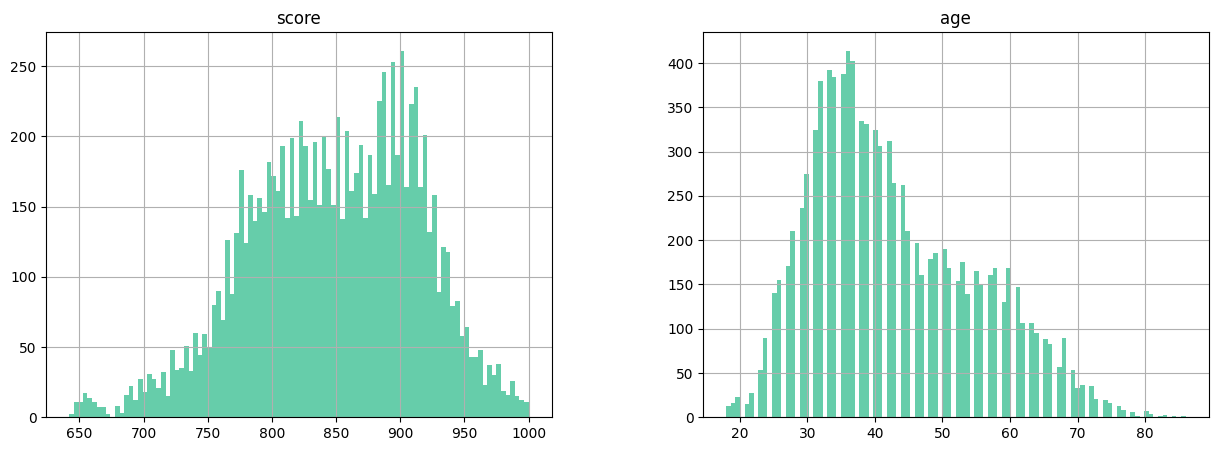

In [13]:
(
    df[['score', 'age']]
    .hist(figsize=(15,5), bins=100, color='mediumaquamarine')
) 
plt.show()

Из представленной таблицы можно сделать следующие выводы:
* Средний скорринговый балл клиентов - 849 баллов, медиана - 853 балла. На гистограмме распределения наблюдается пиковое значение в диапазоне 880-920 баллов. 

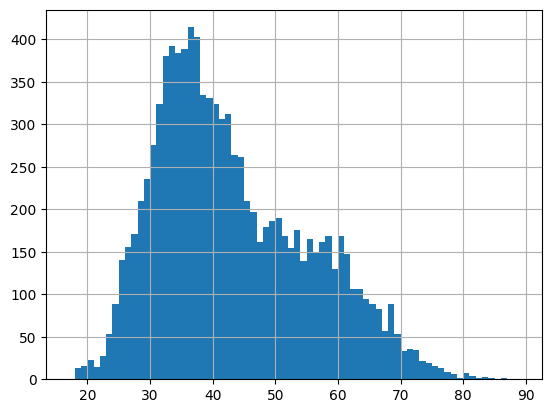

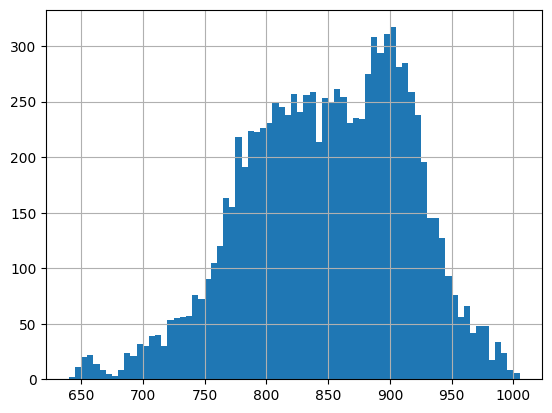

In [14]:
df.age.hist(bins=range(17,90))
plt.show()
df.score.hist(bins=range(640,1010,5));

* Средний возраст клиентов 43 года, медианный - 40 лет, при этом при рассмотрении гистграммы видно, что имеется пиковое значение количества пользователей на отвеметке 35-37 лет,
* Имеется значительная разница в значении баланса на счете между средним и медианным значением (среднее значение на 57,9% больше медианного), а значит в данном поле имется аномальные  значения, которые сказываются на разнице.
* Имеется так же различие между средней и медианной оценочной заработной платой клиента (среднее значение на 23,6% больше медианного), на менее выраженное, чем значение баланса.
* Средний балл собственности - 3,
* В среднем клиенты пользуются 2-мя продуктами банка,
* Доля клиентов пользующихся кредитными картами - 68%,
* Доля активных клиентов банка (те, кто в течение месяца совершали контакт (операцию) с банком по тем или иным каналам связи) 52%,
* Доля отточных клиентов в выгрузке (те, кто намереваются покинуть банк) - 18,2%

In [15]:
print(
    ' Количество полных дубликатов в датасете - {}'
    .format(df.duplicated().sum()),
    '\n',
    'Количество дубликатов в ID пользователей - {}'
    .format(df[['userid']].duplicated().sum()),
    '\n',
    'Доля дубликатов во всем датасете {}%'
    .format(df[['userid']].duplicated().sum() / len(df) * 100),
    '\n',
    'Количество дубликатов в ID и городе проживания пользователя - {}'
    .format(df[['userid', 'city']].duplicated().sum()),
    '\n',
    'Количество дубликатов в ID и возрасте пользователя - {}'
    .format(df[['userid', 'age']].duplicated().sum()),
    '\n',
    'Количество дубликатов в ID, пол и возраст пользователей - {}'
    .format(df[['userid', 'gender', 'age']].duplicated().sum())
)

 Количество полных дубликатов в датасете - 0 
 Количество дубликатов в ID пользователей - 73 
 Доля дубликатов во всем датасете 0.73% 
 Количество дубликатов в ID и городе проживания пользователя - 0 
 Количество дубликатов в ID и возрасте пользователя - 5 
 Количество дубликатов в ID, пол и возраст пользователей - 2


In [16]:
df[df['userid'].duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 1583 to 9970
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         73 non-null     int64  
 1   score          73 non-null     Int64  
 2   city           73 non-null     object 
 3   gender         73 non-null     object 
 4   age            51 non-null     Int64  
 5   equity         73 non-null     int64  
 6   balance        38 non-null     float64
 7   products       73 non-null     int64  
 8   credit_card    73 non-null     int64  
 9   last_activity  73 non-null     int64  
 10  est_salary     73 non-null     float64
 11  churn          73 non-null     int64  
dtypes: Int64(2), float64(2), int64(6), object(2)
memory usage: 7.6+ KB


In [17]:
print(df['city'].unique())
print(df['gender'].unique())
print(df['products'].unique())

['Рыбинск' 'Ярославль' 'Ростов']
['Ж' 'М']
[2 3 1 4 5 0]


In [18]:
df.query('products == 0')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1


Доля дубликатов в датасете занимает всего 0,73% от всех данных, при этом в среди строк дубликатов имеется пропуски в столбцах age и balance.

Удалим дублирующие значения, т.к. в нашем датасете не должно быть дублирующих id пользователей и пользователей с 0 продуктов в банке.

Неявных дубликатов или ошибок в данных в столбцах city и gender не обнаружено.

In [19]:
df = df.drop_duplicates('userid')
df = df.query('products != 0')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9926 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9926 non-null   int64  
 1   score          9926 non-null   Int64  
 2   city           9926 non-null   object 
 3   gender         9926 non-null   object 
 4   age            9922 non-null   Int64  
 5   equity         9926 non-null   int64  
 6   balance        7667 non-null   float64
 7   products       9926 non-null   int64  
 8   credit_card    9926 non-null   int64  
 9   last_activity  9926 non-null   int64  
 10  est_salary     9926 non-null   float64
 11  churn          9926 non-null   int64  
dtypes: Int64(2), float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [21]:
df[df['age'].isna()]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932,Ярославль,М,<NA>,5,7601719.20,2,1,1,408121.16,0
3091,138660,836,Ростов,Ж,<NA>,5,294315.53,2,0,1,63310.22,1
4912,210674,834,Рыбинск,М,<NA>,1,238330.52,2,0,1,93775.06,0
7345,184913,829,Ярославль,Ж,<NA>,3,188648.77,2,0,1,75206.90,0


После удаления дубликатов видно, что осталось 4 клиента с пропущенными данными в указании возраста. Заполнение пропусков какими-либо значениями будет не корректно.

Для дальнейшего анализа портретов и последуюшей категоризации клиентов считаю, что необходимо удалить клиентов с отсутствующими данными в столбце с возрастом.

In [22]:
df.dropna(subset=['age'], inplace=True)
len(df)

9922

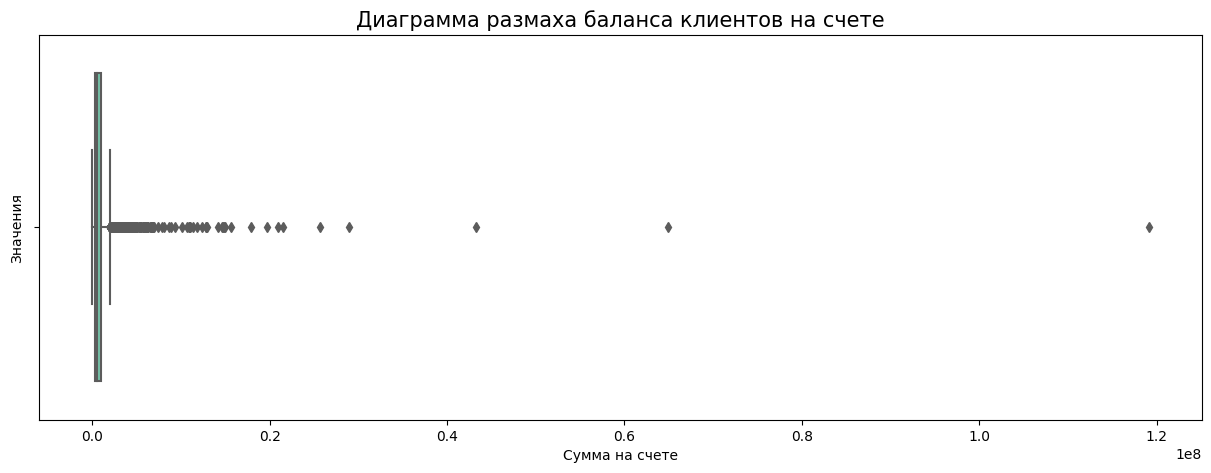

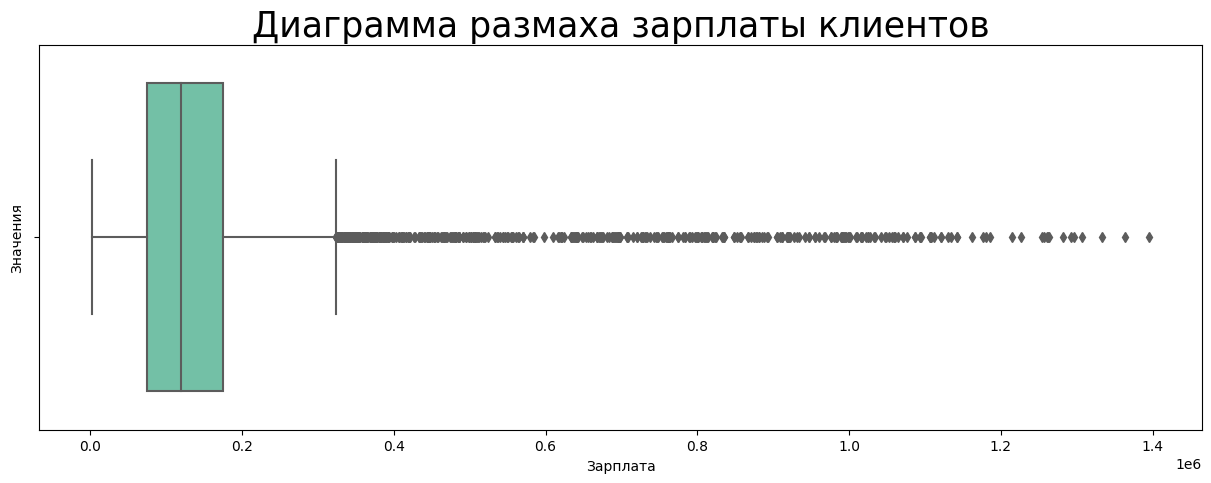

In [23]:
plt.subplots(figsize=(15, 5))
boxplot = sns.boxplot(x='balance', data=df, palette=['mediumaquamarine'])
boxplot.axes.set_title("Диаграмма размаха баланса клиентов на счете", fontsize=15)
boxplot.set_xlabel("Сумма на счете", fontsize=10)
boxplot.set_ylabel("Значения", fontsize=10) 

plt.subplots(figsize=(15, 5))
boxplot = sns.boxplot(x='est_salary', data=df, palette=['mediumaquamarine'])
boxplot.axes.set_title("Диаграмма размаха зарплаты клиентов", fontsize=25)
boxplot.set_xlabel("Зарплата", fontsize=10)
boxplot.set_ylabel("Значения", fontsize=10) 

plt.show()

На диаграмме размаха заработной платы и баланса на счете наблюдается значительное количество выбросов, соответственно, при дальнейшем анализе будем использовать медианное значение этих столбцов, чтобы исключить влияние выбросов. 

Для дальнейшей работы и построения визуализаций клиентов в разрезе заработной платы и баланса на счете переведем значения этих столбцов в тысячи рублей.

In [24]:
df['est_salary'] = df['est_salary'].apply(lambda x: x / 1000)
df['balance'] = df['balance'].apply(lambda x: x / 1000)

**Выводы по разделу:**
* Представленный датасет с информацией о клиентах банка изначально состоял из 10 000 строк и 12 столбцов;
* Был изменен тип столбцов с возрастом заемщика и скорринговым баллом с  float64 (дробное число) в целочисленное значение.
* Были выявлено наличие пропусков в столбце age  доля пропусков - 0.26% и в столбце balance - 22.95%.
* Неявных дубликатов или ошибок в данных в столбцах city и gender не обнаружено.
* Доля дубликатов в датасете  0,73% от всех данных, которые были удалены.
* После удаления дубликатов осталось 4 клиента с пропущенными данными в указании возраста. Заполнение пропусков какими-либо значениями не корректно. Эти строки были удалены.
* Удален 1 пользователей с 0 продуктов в банке.
* После удаления строк в датасете осталась информация о 9 922 клиентах банка, потери составили 78 клиентов или 0,78%.
* На диаграмме размаха заработной платы и баланса на счете наблюдается значительное количество выбросов,
* Столбцы с заработной платой и балансом на счете клиентов переведены в тысячи рублей.

*Информация о клиентах:*
* Средний скорринговый балл клиентов - 849 баллов, медианное значение - 853 балла. На гистограмме распределения наблюдается пиковое значение на отметке 910-920 баллов.
* Средний возраст клиентов 43 года, медианный - 40 лет, при этом при рассмотрении гистограммы видно, что имеется пиковое значение количества пользователей на отметке 35-37 лет,
* Имеется значительная разница в значении баланса на счете между средним и медианным значением (среднее значение на 57,9% больше медианного), а значит в данном поле имется аномально высокие/низкие значения, которые сказываются на разнице.
* Имеется так же различие между средней и медианной оценочной заработной платой клиента (среднее значение на 23,6% больше медианного), но менее выраженное, чем значение баланса.
* Средний балл собственности клиентов - 3,
* В среднем клиенты пользуются 2-мя продуктами банка,
* Доля клиентов пользующихся кредитными картами - 68%,
* Доля активных клиентов банка (те, кто в течение месяца совершали контакт с банком по тем или иным каналам связи или какую-либо операцию) 52%,
* Доля отточных клиентов в выгрузке (те, кто намереваются покинуть банк) - 18,2%.

## 2. Подготовка данных к анализу

#### Кодирование данных

В представленном датасете имеются столбцы с категориальными признаками - city и gender.

Gри кодировании будем придерживаться принципе *One-Hot Encoder*. Данный тип кодирования, основывается на создании бинарных признаков, которые показывают принадлежность к уникальному значению. 

Для того, чтобы в последующем иметь возможность применять среднее и смотреть корреляцию закодируем значения в этих столбцах, для этого создадим 4 дополнительных столбца:
* is_man - 1 если клиент является мужчиной и 0 если нет,
* rostov_city - 1 если клиент из Ростова и 0 если нет,
* rybinsk_city - 1 если клиент из Рыбинская и 0 если нет,
* yaroslavl_city - 1 если клиент из Ярославля и 0 если нет.



In [25]:
df['gender_2'] = df['gender']
df = pd.get_dummies(df, columns=['gender_2'], drop_first=True)

In [26]:
df['cities'] = df['city']
df = pd.get_dummies(df, columns=['cities'])

In [27]:
df = df.rename(columns={'gender_2_М': 'is_man', 
                       'cities_Ростов': 'rostov_city',
                       'cities_Рыбинск': 'rybinsk_city',
                       'cities_Ярославль': 'yaroslavl_city'})

#### Анализ пропущенных значений и их обработка (при необходимости);

In [28]:
print('Доля пропусков в информации о балансе на счете - {}%'
    .format(round(len(df[df['balance'].isna()]) / len(df) * 100, 2)))

Доля пропусков в информации о балансе на счете - 22.77%


22,78% это существенная часть датасета с пропусками.

Выясним к какому из типов модно отнести пропуски в этом значении (MCAR (Отсутствует совершенно случайно), MAR (Отсутствует случайно), MNAR (Отсутствует не случайно)).

Проанализируем возможные причины отсутствия данных. Для этого проверим взаимосвязь пропуска в балансе со следующими значениями:
* город,
* возраст,
* скорринговый балл,
* балл собственности, 
* количество продуктов банка у клиента,
* наличие кредитной карты, 
* активен ли клиент,
* оценочная заработная плата.

При сравнении этих значений создадим в две переменных:
1. Срез датасета без пропусков балансе - *balance_full*.
2. Срез датасета с пропусками в балансе - *balance_miss*.

Сравнивать будем следующими способами:
1. Анализ распределения значений и их сравнение с целью вывления различий. Построение гистограмм распределения по столбцам - *score, age, est_salary*.
2. Анализ корреляции между наличием пропусков в информации о балансе с другими значениями.
3. Проведение статистического теста на равенство средних значений - для столбца *score*.

In [29]:
balance_miss = df.query('balance.isna()')
balance_full = df.dropna(subset=['balance'])

Строим гистограмму распределения по столбцу с информацией о скорринговом балле пользователей.

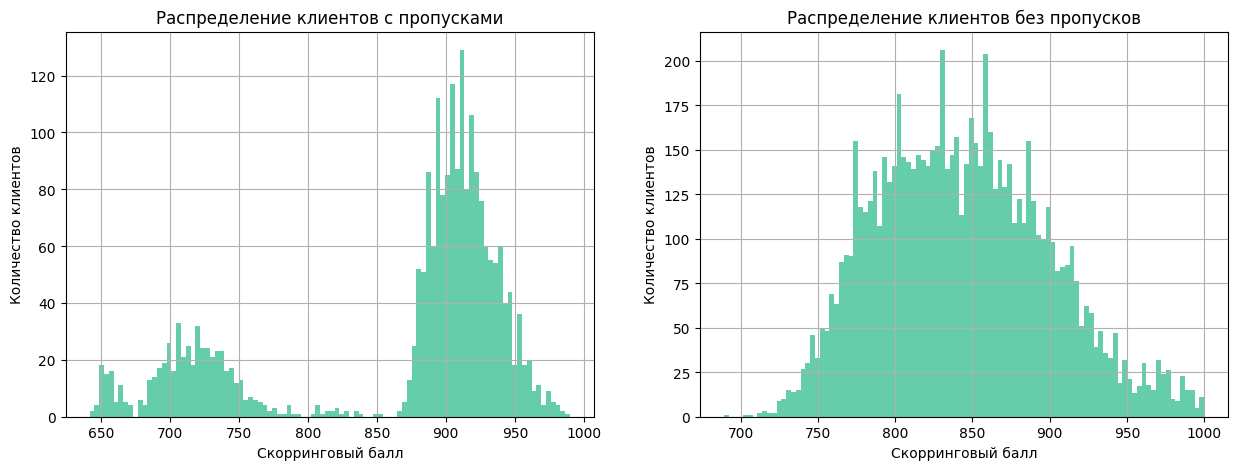

In [30]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
balance_miss['score'].hist(bins=100, color='mediumaquamarine', ax=ax1)
plt.ylabel('') 
plt.title('Распределение клиентов с пропусками')
plt.xlabel('Cкорринговый балл') 
plt.ylabel('Количество клиентов')

ax2 = fig.add_subplot(1, 2, 2)
balance_full['score'].hist(bins=100, color='mediumaquamarine', ax=ax2)
plt.ylabel('') 

plt.title('Распределение клиентов без пропусков')
plt.xlabel('Cкорринговый балл') 
plt.ylabel('Количество клиентов')
plt.show()

Из представленных двух гистограмм видно, что у среза датасета без пропусков наблюдается нормальное распределение значений и пиковыми значениями в промеждутке от 800 до 870 баллов, когда у пользователей с пропусками в данном диапазоне значений наблюдается "провал", а пиковые значения приходятся на диапазон 870 - 930 баллов.

Рассмотрим распределение возраста клиентов в двух срезах датасета.

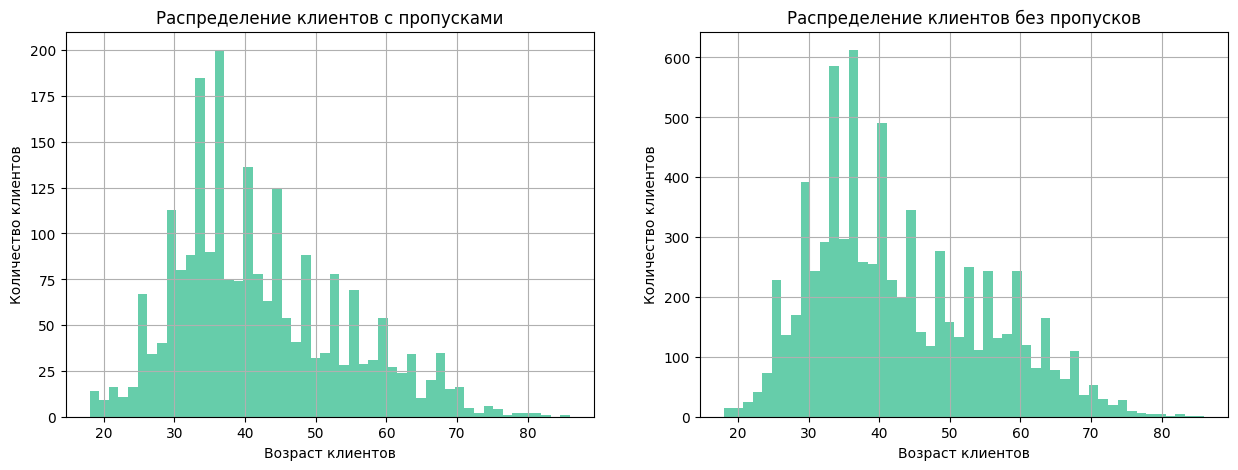

In [31]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
balance_miss['age'].hist(bins=50, color='mediumaquamarine', ax=ax1)
plt.ylabel('') 
plt.title('Распределение клиентов с пропусками')
plt.xlabel('Возраст клиентов') 
plt.ylabel('Количество клиентов')

ax2 = fig.add_subplot(1, 2, 2)
balance_full['age'].hist(bins=50, color='mediumaquamarine', ax=ax2)
plt.ylabel('') 

plt.title('Распределение клиентов без пропусков')
plt.xlabel('Возраст клиентов') 
plt.ylabel('Количество клиентов')
plt.show()

Распределение клиентов по возрасту в датасете с пропусками и без пропусков в балансе имеет схожую тенденцию.

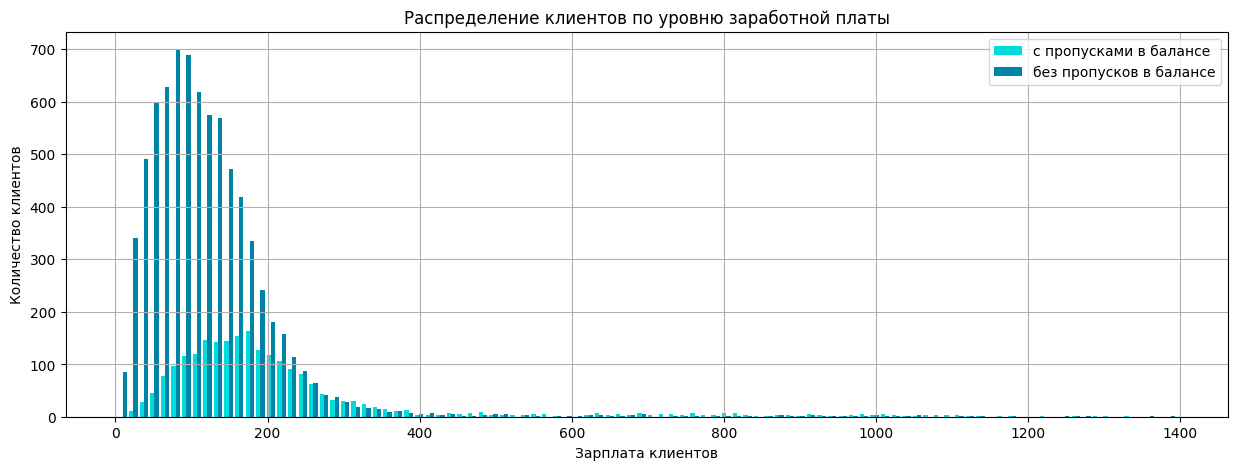

In [32]:
plt.figure(figsize=(15, 5))
plt.hist([balance_miss['est_salary'], balance_full['est_salary']], bins=100,  
         color=['#00dcdb', '#0084a6'], label=['с пропусками в балансе', 'без пропусков в балансе'])

plt.title('Распределение клиентов по уровню заработной платы')
plt.xlabel('Зарплата клиентов') 
plt.ylabel('Количество клиентов')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

При анализе распределения клиентов по заработной плате в датасете с пропусками и без пропусков в балансе видно, что у клиентов с пропусками в балансе заработная плата выше, чем у клиентов без пропусков.

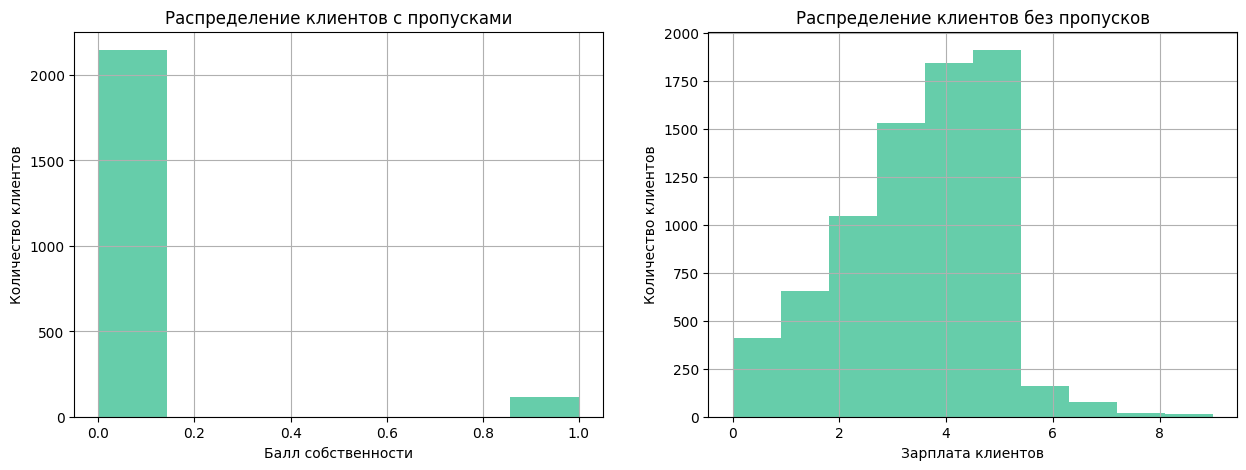

In [33]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
balance_miss['equity'].hist(bins=7, color='mediumaquamarine', ax=ax1)
plt.ylabel('') 
plt.title('Распределение клиентов с пропусками')
plt.xlabel('Балл собственности') 
plt.ylabel('Количество клиентов')

ax2 = fig.add_subplot(1, 2, 2)
balance_full['equity'].hist(bins=10, color='mediumaquamarine', ax=ax2)
plt.ylabel('') 

plt.title('Распределение клиентов без пропусков')
plt.xlabel('Зарплата клиентов') 
plt.ylabel('Количество клиентов')
plt.show()

In [34]:
for col in ['city', 'gender', 'products', 'credit_card','last_activity', 'churn']:
    print(f'Столбец {col}. Срез с пропусками в балансе')
    print(round(balance_miss[col].value_counts(normalize=True),2))
    print()
    print(f'Столбец {col}. Срез без пропусков в балансе')
    print(round(balance_full[col].value_counts(normalize=True),2))
    print('---' * 15)

Столбец city. Срез с пропусками в балансе
Ярославль    0.64
Рыбинск      0.25
Ростов       0.10
Name: city, dtype: float64

Столбец city. Срез без пропусков в балансе
Ярославль    0.57
Рыбинск      0.27
Ростов       0.15
Name: city, dtype: float64
---------------------------------------------
Столбец gender. Срез с пропусками в балансе
М    0.56
Ж    0.44
Name: gender, dtype: float64

Столбец gender. Срез без пропусков в балансе
Ж    0.52
М    0.48
Name: gender, dtype: float64
---------------------------------------------
Столбец products. Срез с пропусками в балансе
1    0.85
2    0.14
3    0.01
Name: products, dtype: float64

Столбец products. Срез без пропусков в балансе
2    0.62
1    0.18
3    0.13
4    0.06
5    0.00
Name: products, dtype: float64
---------------------------------------------
Столбец credit_card. Срез с пропусками в балансе
1    0.82
0    0.18
Name: credit_card, dtype: float64

Столбец credit_card. Срез без пропусков в балансе
1    0.64
0    0.36
Name: credit_car

Из представленных данных можно сделать следующий вывод: пропуск в балансе чаще встречается у пользователей, которые:
* имеют кредитную карту - 82% (против 64% в срезе без пропусков),
* НЕ склонны к оттоку - 99% (против 76% в срезе без пропусков)
* имеют менее 1 балла собственности,
* пользуются 1 продуктом банка,
* скорринговый балл у клиентов с пропусками зачастую находится в диапазонах 650-750 и 870-950, т.е. наблюдается малое количество пропусков у клиентов со скорринговым баллом в диапазоне 750-870,
* заработная плата у клиентов с пропусками выше.

В связи с тем, что 99% клиентов с пропусками НЕ склонны к оттоку в датасете и не известен период за который производилась выгрузка и нет информации в динамике (возможно часть клиентов только открыла счет и стала клиентом банка и не успела провести транзакцию) заполнение данных значений на основании каких-либо критериев считаю не корректным.

Заполнение пропущенных значений 0 так же считаю не корректным, так же не совсем ясно, что подразумевается под балансом на счете (собственные средства, кредитные или совокупные денежные средства).

## 3. Исследовательский анализ данных

### 3.1. Анализ распределения клиентов (в т.ч. в разрезе оттока)

In [35]:
colors = ['#F5F3C1', '#00dcdb', '#0084a6']

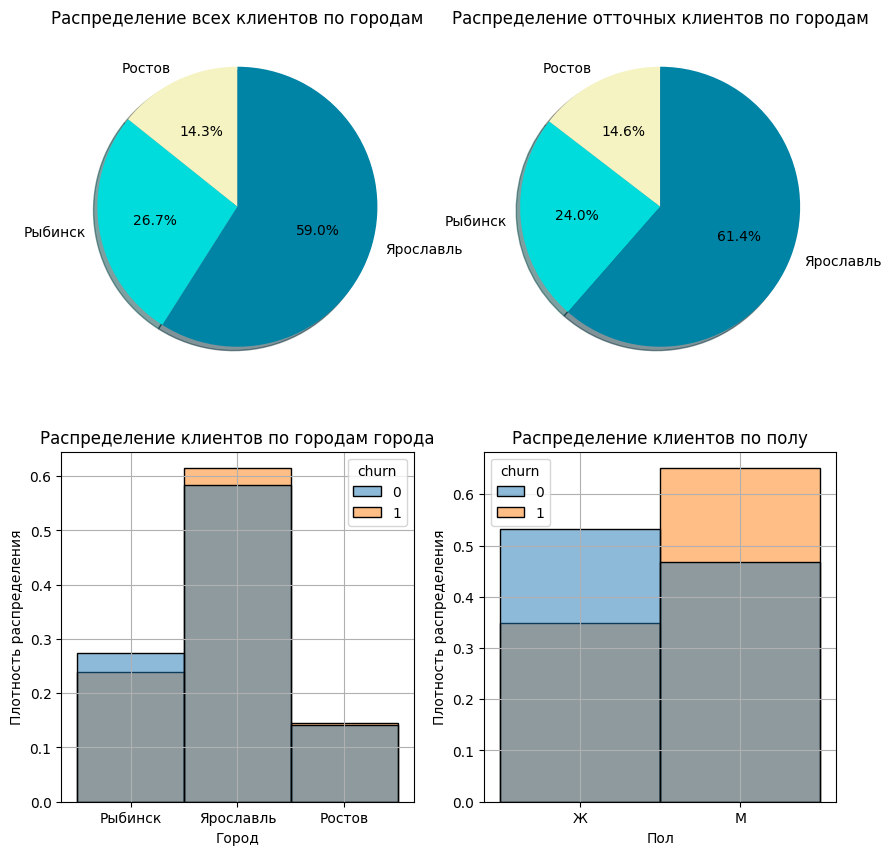

In [36]:
fig = plt.figure(figsize=(10, 10))
# fig, ax = plt.subplots(nrows= 2 , ncols= 2)

ax1 = fig.add_subplot(2, 2, 1)

(
    df
    .pivot_table(index='city', values='userid', aggfunc='count')
    .sort_values(by='userid')
    .plot(autopct='%1.1f%%', legend = False, subplots=True, kind='pie', 
          figsize=(4, 4), startangle=90, shadow=True, colors=colors, ax=ax1)
)
plt.ylabel('') 
plt.title('Распределение всех клиентов по городам')

ax2 = fig.add_subplot(2, 2, 2)

(
    df
    .query('churn == 1')
    .pivot_table(index='city', values='userid', aggfunc='count')
    .sort_values(by='userid')
    .plot(autopct='%1.1f%%', legend = False, subplots=True, kind='pie', 
          figsize=(4, 4), startangle=90, shadow=True, colors=colors, ax=ax2)
)
plt.ylabel('') 
plt.title('Распределение отточных клиентов по городам')

ax3 = fig.add_subplot(2, 2, 3)
sns.histplot(data=df, hue='churn', x='city', stat='density', common_norm=False, ax=ax3)
plt.title('Распределение клиентов по городам города')
plt.xlabel('Город')
plt.ylabel('Плотность распределения')
plt.grid()

ax4 = fig.add_subplot(2, 2, 4)
sns.histplot(data=df, hue='churn', x='gender', stat='density', common_norm=False, ax=ax4)

plt.title('Распределение клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Плотность распределения')
plt.grid()

plt.show()

Наибольшая доля пользователей банка из Ярославля - 59%, при анализе отточных клиентов наибольшую долю отточных клиентов демонстрирует так же Ярославль. При анализе распределения клиентов по полу видно, что более склонны к оттоку мужчины.

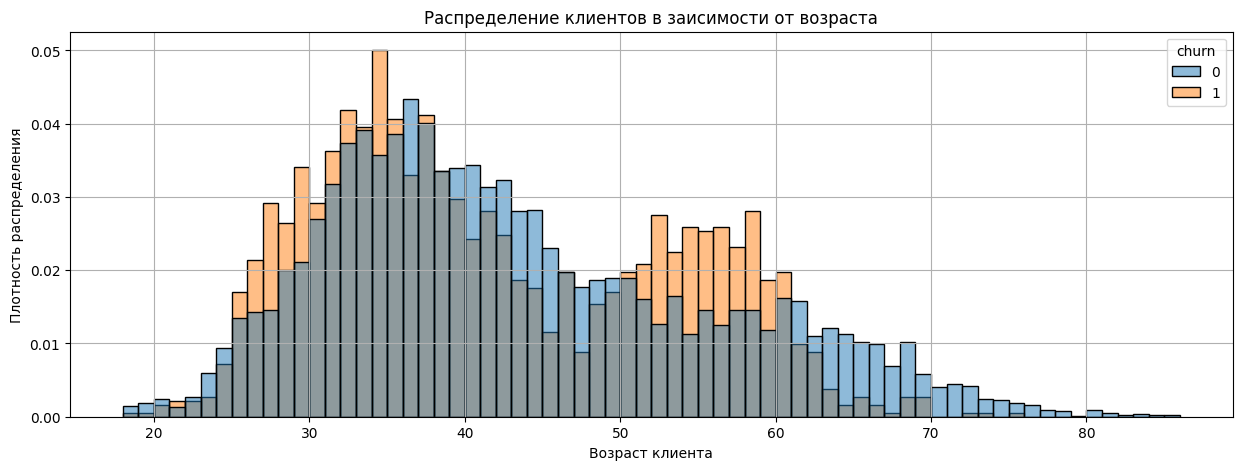

In [37]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df, hue='churn', x='age', stat='density', common_norm=False, binwidth=1)
plt.title('Распределение клиентов в заисимости от возраста')
plt.xlabel('Возраст клиента')
plt.ylabel('Плотность распределения')
plt.grid()
plt.show()

Из представленно диаграммы видно, что клиенты наиболее склонны к оттоку следующего возраста:
* с 26 до 35 лет,
* с 51 до 61 года.

Стоимит отметить, что соотношение отточных клиентов к неотточным больше в возрастах 27-29, 34 и 51-60 лет.

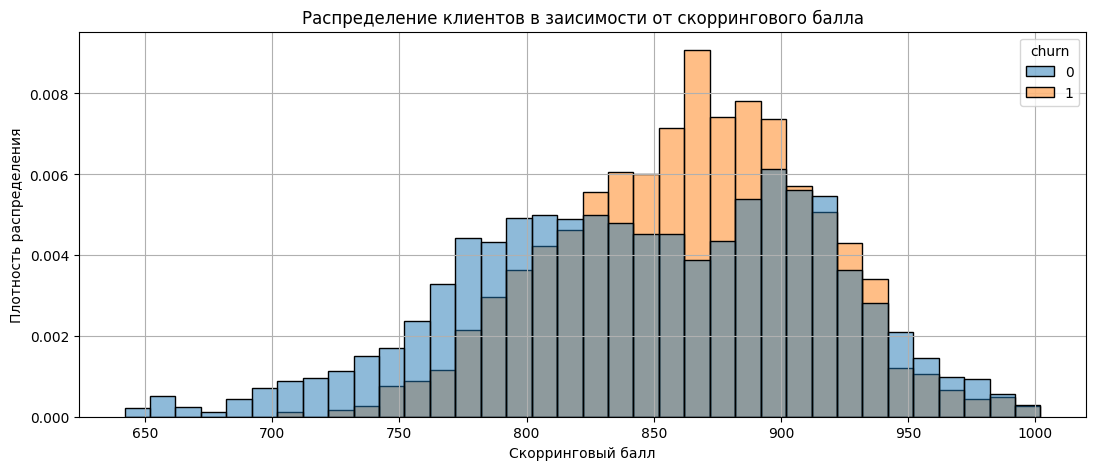

In [38]:
plt.figure(figsize=(13, 5))
sns.histplot(data=df, hue='churn', x='score', stat='density', common_norm=False, binwidth=10)
plt.title('Распределение клиентов в заисимости от скоррингового балла')
plt.xlabel('Скорринговый балл')
plt.ylabel('Плотность распределения')
plt.grid()
plt.show()

Из представленных диаграмм видно, что клиенты более склонны к оттоку со скорринговым баллом 830-900 и 930-940 баллов. Соответственно, банк склонны покидать платежеспособные клиенты, что может сказываться на результатах работы банка.

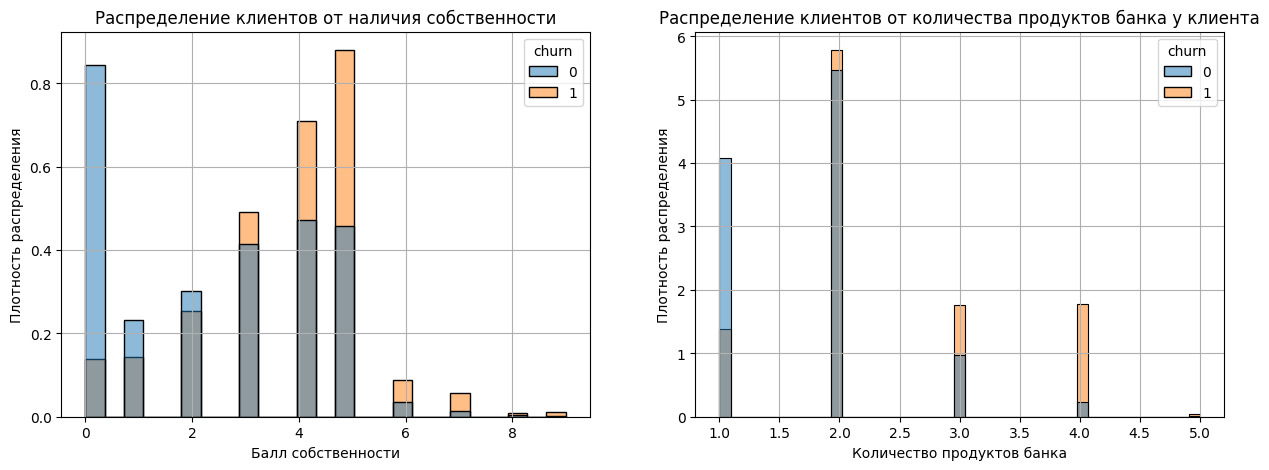

In [39]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1)
sns.histplot(data=df, hue='churn', x='equity', stat='density', common_norm=False, ax=ax1)
plt.title('Распределение клиентов от наличия собственности')
plt.xlabel('Балл собственности')
plt.ylabel('Плотность распределения')
plt.grid()

ax2 = fig.add_subplot(1, 2, 2)
sns.histplot(data=df, hue='churn', x='products', stat='density', common_norm=False, ax=ax2)

plt.title('Распределение клиентов от количества продуктов банка у клиента')
plt.xlabel('Количество продуктов банка')
plt.ylabel('Плотность распределения')
plt.grid()

plt.show()

Из представленных диаграмм видно, что более склонны к оттоку клиенты имеющие баллы собственности от 3 до 7, а так же клиенты имеющие от 2 продуктов банка. 

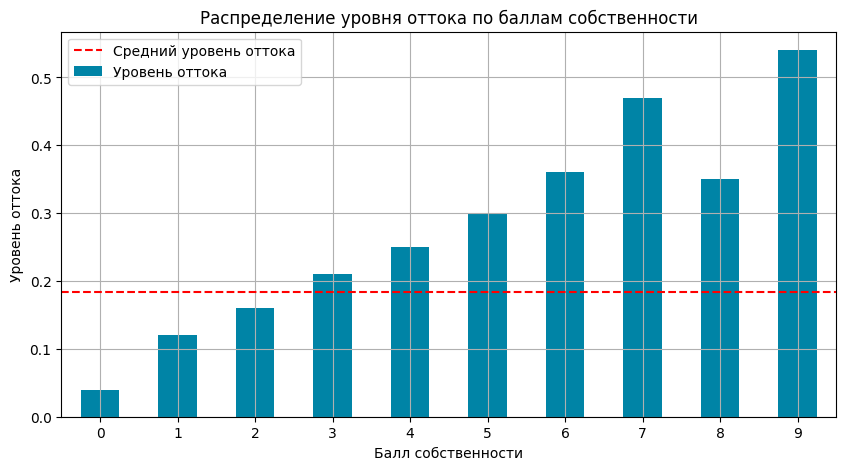

In [40]:
(
    df
    .pivot_table(index='equity', values='churn', aggfunc='mean').round(2)
    .rename(columns={'churn': 'Уровень оттока'})
    .plot.bar(color='#0084a6', figsize=(10, 5))
    .tick_params(rotation=0, labelsize=10)
)
plt.title('Распределение уровня оттока по баллам собственности')
plt.xlabel('Балл собственности') 
plt.ylabel('Уровень оттока')
plt.grid(True)
plt.axhline(y=df['churn'].mean(), color='red', linestyle='--', label='Средний уровень оттока')
plt.legend()
plt.show()

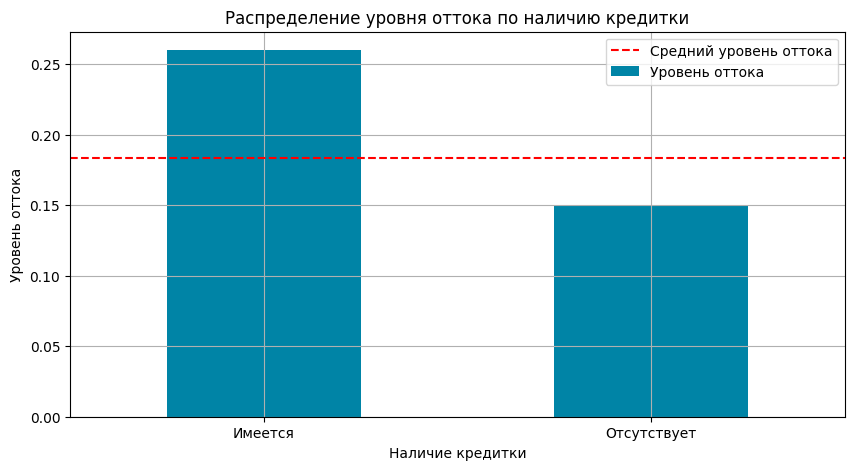

In [41]:
(
    df
    .replace({'credit_card' : {0 : 'Имеется', 1: 'Отсутствует'}})
    .pivot_table(index='credit_card', values='churn', aggfunc='mean').round(2)
    .rename(columns={'churn': 'Уровень оттока'})
    .plot.bar(color='#0084a6', figsize=(10, 5))
    .tick_params(rotation=0, labelsize=10)
)
plt.title('Распределение уровня оттока по наличию кредитки')
plt.xlabel('Наличие кредитки') 
plt.ylabel('Уровень оттока')
plt.grid(True)
plt.axhline(y=df['churn'].mean(), color='red', linestyle='--', label='Средний уровень оттока')
plt.legend()
plt.show()

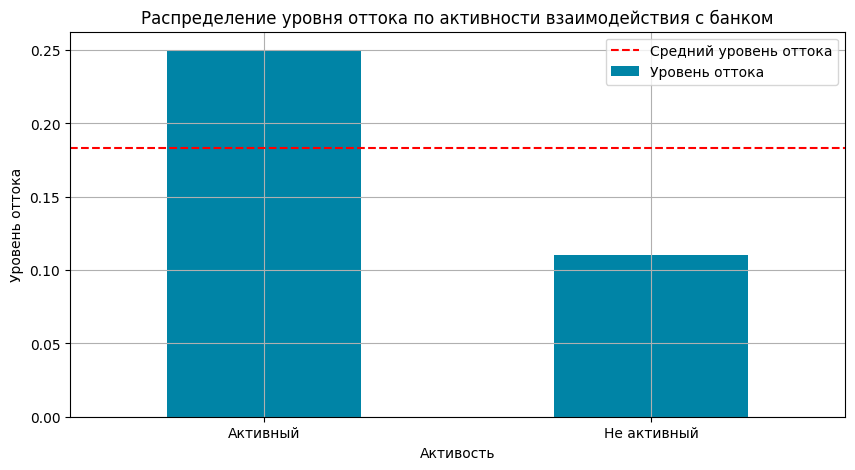

In [42]:
(
    df
    .replace({'last_activity' : {0 : 'Не активный', 1: 'Активный'}})
    .pivot_table(index='last_activity', values='churn', aggfunc='mean').round(2)
    .rename(columns={'churn': 'Уровень оттока'})
    .plot.bar(color='#0084a6', figsize=(10, 5))
    .tick_params(rotation=0, labelsize=10)
)
plt.title('Распределение уровня оттока по активности взаимодействия с банком')
plt.xlabel('Активость') 
plt.ylabel('Уровень оттока')
plt.grid(True)
plt.axhline(y=df['churn'].mean(), color='red', linestyle='--', label='Средний уровень оттока')
plt.legend()
plt.show()

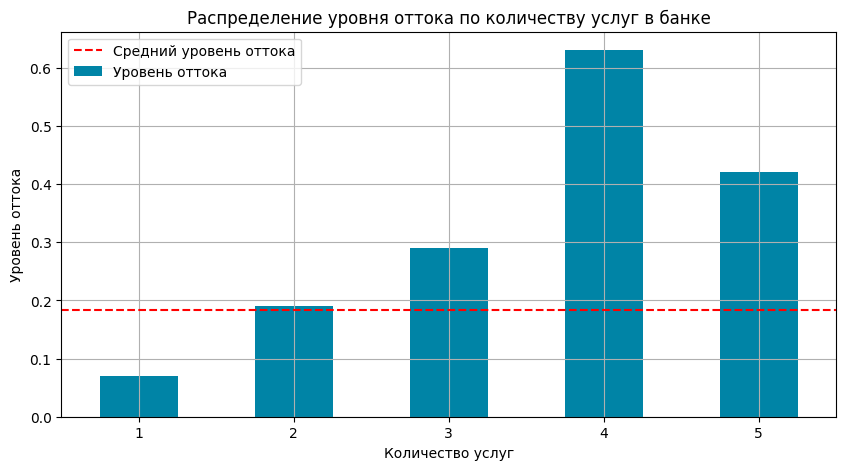

In [43]:
(
    df
    .pivot_table(index='products', values='churn', aggfunc='mean').round(2)
    .rename(columns={'churn': 'Уровень оттока'})
    .plot.bar(color='#0084a6', figsize=(10, 5))
    .tick_params(rotation=0, labelsize=10)
)
plt.title('Распределение уровня оттока по количеству услуг в банке')
plt.xlabel('Количество услуг') 
plt.ylabel('Уровень оттока')
plt.grid(True)
plt.axhline(y=df['churn'].mean(), color='red', linestyle='--', label='Средний уровень оттока')
plt.legend()
plt.show()

Наибольший отток наблюдается у клиентов имеющих 4 продукта банка и клиентов с 4-5 баллами собственности.

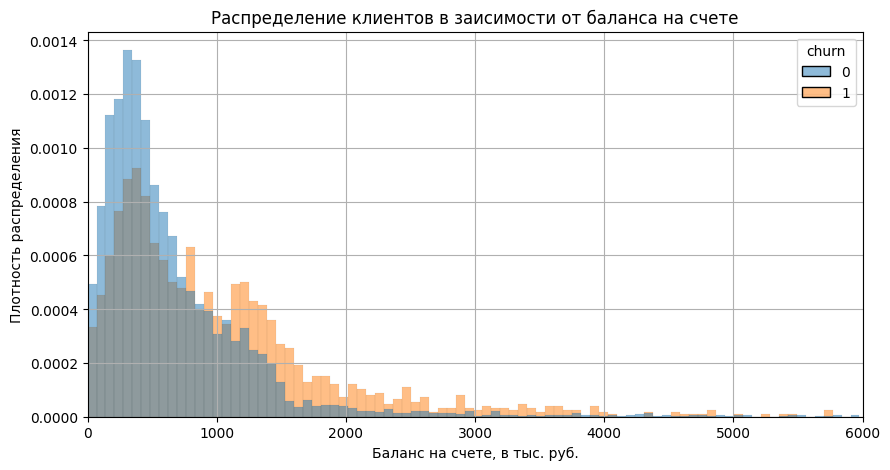

In [44]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, hue='churn', stat='density', x='balance', common_norm=False)
plt.title('Распределение клиентов в заисимости от баланса на счете')
plt.xlabel('Баланс на счете, в тыс. руб.')
plt.ylabel('Плотность распределения')
plt.xlim(0, 6000)
plt.grid()
plt.show()

Из представленной диаграммы видно, что соотношение отточных к неотточным больше при балансе на счете от 1 000 000 руб., стоит отметить что анализ данного показателя может не сильно влиять на отточность, т.к. информация о балансе выгружена на конкретную дату, здесь можно только предположить, что в банке имеется не совсем комфортные условия по хранению крупных сумм, либо отсутствие "плюшек" для клиентов для хранения таких сумм.

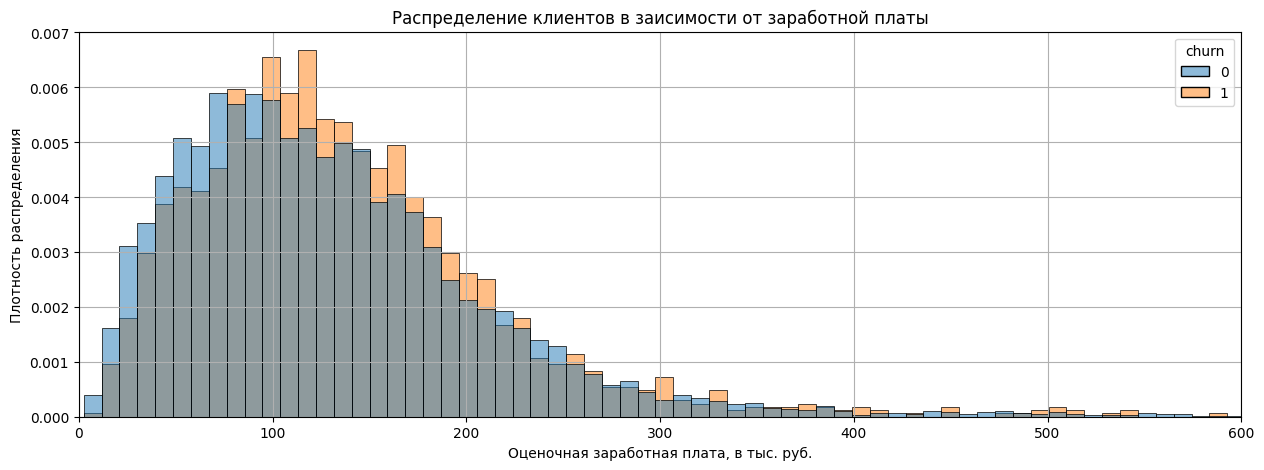

In [45]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df, hue='churn', x='est_salary', stat='density', common_norm=False)
plt.title('Распределение клиентов в заисимости от заработной платы')
plt.xlabel('Оценочная заработная плата, в тыс. руб.')
plt.ylabel('Плотность распределения')
plt.xlim(0, 600)
plt.grid()
plt.show()

Представленная диаграмма так же отражает склонность к оттоку более состоятельных клиентов, наибольший отток наблюдается в диапазоне от 100 000 руб. до 220 000 руб. 

In [46]:
df.query('100 < est_salary < 220').agg({"churn":['count','mean']})

,churn
count,4685.00000
mean,0.20555


In [47]:
ffdf.query('est_salary > 220').agg({"churn":['count','mean']})

,churn
count,1336.000000
mean,0.172904


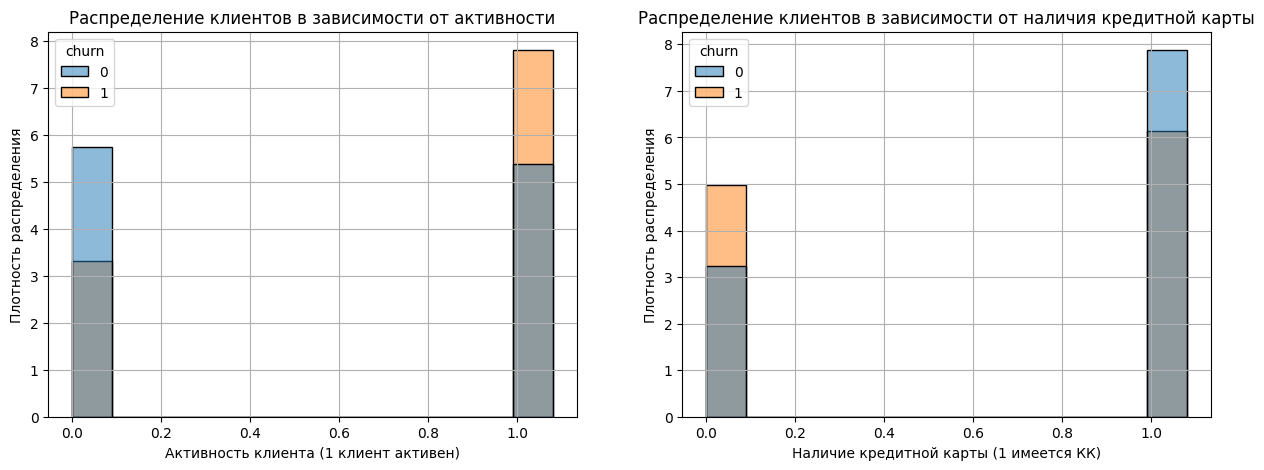

In [48]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1)
sns.histplot(data=df, hue='churn', x='last_activity', common_norm=False, stat='density', ax=ax1, binwidth=0.09)
plt.title('Распределение клиентов в зависимости от активности')
plt.xlabel('Активность клиента (1 клиент активен)')
plt.ylabel('Плотность распределения')
plt.grid()

ax2 = fig.add_subplot(1, 2, 2)
sns.histplot(data=df, hue='churn', x='credit_card', common_norm=False, stat='density', ax=ax2, binwidth=0.09)

plt.title('Распределение клиентов в зависимости от наличия кредитной карты')
plt.xlabel('Наличие кредитной карты (1 имеется КК)')
plt.ylabel('Плотность распределения')
plt.grid()

plt.show()

Из представленных диаграмм видно, что активные клиенты более склонны к оттоку, а так же клиенты, которые не имеют кредитную карту.

**Вывод:** Клиенты более склонные к оттоку имеют следующие признаки:
* мужчины,
* из Ярославля,
* в возрасте с 26 до 35 лет и с 51 до 61 года,
* со скорринговым баллом 830-900 и 930-940 баллов,
* баланс на счете от 1 000 000 руб.,
* оценочную заработную плату от 100 000 руб. до 220 000 руб.,
* баллы собственности от 3 до 7, 
* активные клиенты,
* не имеющие кредитную карту,
* от 2 продуктов банка. 

### 3.2. Составление портретов клиентов и их сравнение с целью выявления особенностей поведения

In [49]:
clients = (
    df
    .groupby(by='churn')
    .agg({'is_man': 'mean',
          'age': 'mean',
          'score' : 'mean',
          'equity': 'mean',
          'balance': 'median',
          'products': 'mean',
          'credit_card': 'mean',
          'last_activity': 'mean',
          'est_salary': 'median'})
    .T
)

clients['delta'] = ((clients[1] / clients[0]) - 1) * 100
clients = clients.sort_values(by='delta').reset_index()
clients

churn,index,0,1,delta
0,credit_card,0.708909,0.551705,-22.17548
1,age,43.016288,41.429593,-3.688592
2,score,845.436451,863.361936,2.120264
3,est_salary,118.248515,125.40888,6.055353
4,products,1.758268,2.377338,35.209102
5,is_man,0.4673,0.650715,39.249932
6,last_activity,0.483218,0.70242,45.362963
7,equity,2.380923,3.763476,58.067957
8,balance,475.3548,783.9089,64.910273


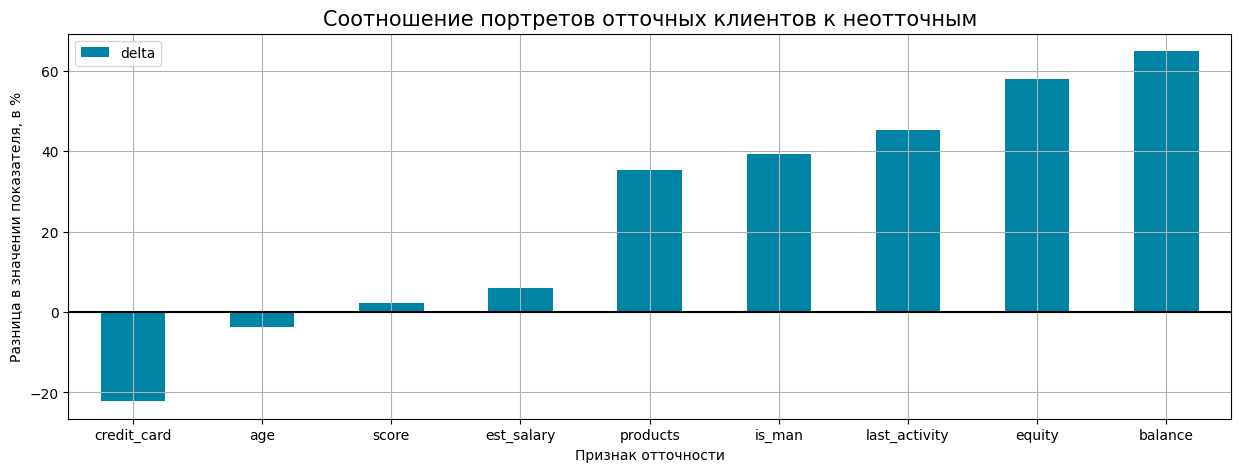

In [50]:
(
    clients
    .plot.bar(x='index', y='delta', figsize=(15, 5), 
              color='#0084a6')
    .tick_params(rotation=0, labelsize=10)
)

plt.xlabel('Признак отточности', size=10) 
plt.ylabel('Разница в значении показателя, в %', size=10) 
plt.title('Соотношение портретов отточных клиентов к неотточным', size=15)
plt.axhline(y=0, color='black')
plt.grid(True)
plt.show()

При сравнении двух портретов клиентов (отточных и неотточных) можно выявить следующие особенности поведения отточных клиентов:
1. Отточные клиенты на 22% **реже** оформляют кредитную карту, чем не отточные;
2. Средний возраст отточных клиентов на на 3,69% **меньше** не отточных;
3. Скорринговый балл отточных клиентов **немного больше** (2,12%) не отточных;
4. Оценочная заработная плата отточных клентов на 6% **выше** не отточных клиентов;
5. Оточные клиенты пользуются на 35% **большим количеством продуктов** банка, чем не отточные;
6. У отточных клиентов на 39% **больше мужчин**, чем у не отточных;
7. Отточные клиенты **активнее контактируют** с банком на 45% больше, чем не отточные;
8. У отточных клиентов **больше балл собственности** на 58%, чем у не отточных;
9. У отточных клиентов **баланс счета больше** на 65%, чем у не отточных.

Можно подытожить, что банк покидают довольно состоятельные клиенты, которые при этом активнее контактируют с банком.

In [51]:
clients = (
    df.query('credit_card == 0')
    .groupby(by='churn')
    .agg({'is_man': 'mean',
          'age': 'mean',
          'score' : 'mean',
          'equity': 'mean',
          'balance': 'median',
          'products': 'mean',
          'last_activity': 'mean',
          'est_salary': 'median'})
    .T
)

clients['delta'] = ((clients[1] / clients[0]) - 1) * 100
clients = clients.sort_values(by='delta').reset_index()
clients

churn,index,0,1,delta
0,age,45.844426,42.181595,-7.989697
1,score,851.977109,874.834356,2.682848
2,products,2.089869,2.37546,13.665526
3,est_salary,111.95361,131.34693,17.322639
4,equity,2.80585,4.019632,43.258977
5,last_activity,0.477745,0.75092,57.1802
6,is_man,0.356507,0.560736,57.28617
7,balance,545.222325,969.489165,77.815383


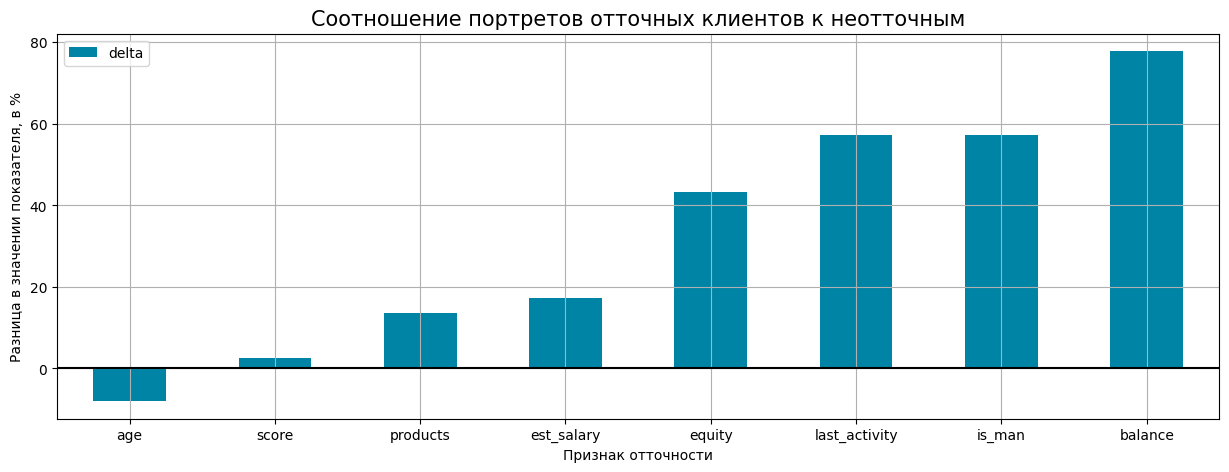

In [52]:
(
    clients
    .plot.bar(x='index', y='delta', figsize=(15, 5), 
              color='#0084a6')
    .tick_params(rotation=0, labelsize=10)
)

plt.xlabel('Признак отточности', size=10) 
plt.ylabel('Разница в значении показателя, в %', size=10) 
plt.title('Соотношение портретов отточных клиентов к неотточным', size=15)
plt.axhline(y=0, color='black')
plt.grid(True)
plt.show()

При исключении пользователей с кредитнкой и сравнении двух портретов клиентов (отточных и неотточных) можно выявить следующие особенности поведения отточных клиентов:
1. Средний возраст отточных клиентов на на 7,9% **меньше** не отточных;
3. Скорринговый балл отточных клиентов **немного больше** (2,68%) не отточных;
4. Оценочная заработная плата отточных клентов на 17,32% **выше** не отточных клиентов;
5. Оточные клиенты пользуются на 13,66% **большим количеством продуктов** банка, чем не отточные;
6. У отточных клиентов на 57% **больше мужчин**, чем у не отточных;
7. Отточные клиенты **активнее контактируют** с банком на 57% больше, чем не отточные;
8. У отточных клиентов **больше балл собственности** на 43%, чем у не отточных;
9. У отточных клиентов **баланс счета больше** на 77,8%, чем у не отточных.

Можно подытожить, что банк покидают довольно состоятельные клиенты, которые при этом активнее контактируют с банком.

### 3.3. Корреляционный анализ

При оценке корреляции будем использовать метод 𝜙k который подходит для работы с переменными смешанного типа.

Используя этот коэффициент, мы можем найти пары переменных, которые имеют (не) ожидаемые корреляции, и оценить их статистическую значимость. Мы также можем интерпретировать зависимости между каждой парой переменных.



In [53]:
phik_overview = (
    df.drop(columns=['userid', 'city', 'gender'], axis=1)
    .phik_matrix()
)

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'is_man', 'rostov_city', 'rybinsk_city', 'yaroslavl_city']


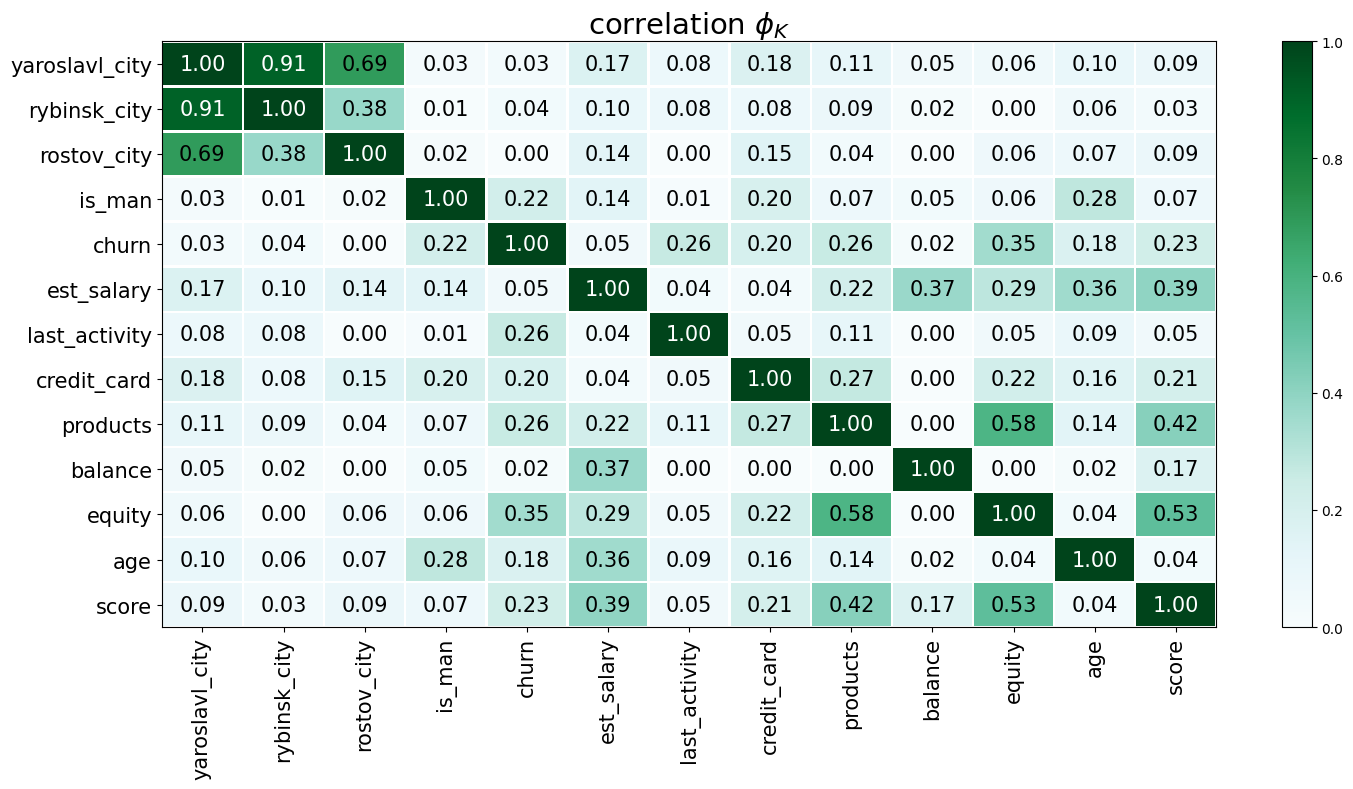

In [54]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="BuGn", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(15, 8))
plt.tight_layout()

Из представленной диаграммы видно, что имеется корреляция между показателем оттока следующими параметрами:
* пол - 22%,
* активность взаимодествия с банком - 26%,
* наличие кредитной картой - 20%,
* количеством продуктов в банке - 44%,
* баллом собственности - 35%,
* возрастом - 18%,
* скорринговым баллом - 23%.

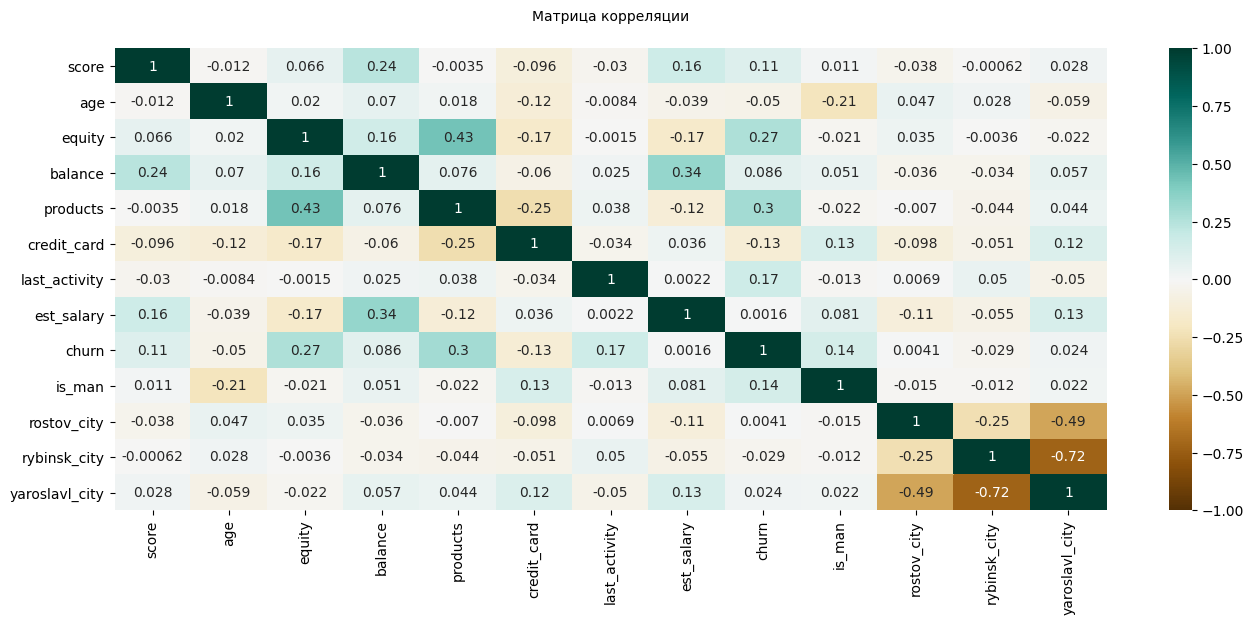

In [55]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.drop(columns=['userid', 'city', 'gender'], axis=1).corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Матрица корреляции', fontdict={'fontsize':10}, pad=20);

Из матрицы корреляции Phik мы получили наличие взаимосвязи оттока с параметрами, из диаграммы корреляции Пирсона видим направление корредяции:
* мужской пол - положительная корреляция,
* активность взаимодествия с банком - положительная корреляция,
* наличие кредитной картой - отрицательная корреляция,
* количеством продуктов в банке - положительная корреляция,
* баллом собственности - положительная корреляция,
* возрастом - отрицательная корреляция,
* скорринговым баллом - положительная корреляция.

Положительная корреляция - при увеличении значения показателя отток увеличивается, при отрицательной корреляции наоборот - при снижении значения показателя корреляция увеличивается.

### 3.4. Вывод по разделу

Проанализировав отточных и не отточных клиентов, можно выделить следующие особенности в портретах у отточных клиентов:
* Отточные клиенты на 22% **реже** оформляют кредитную карту, чем не отточные;
* Средний возраст отточных клиентов на на 3,64% **меньше** не отточных;
* Скорринговый балл отточных клиентов **немного больше** (2,13%) не отточных;
* Оценочная заработная плата отточных клентов на 6% **выше** не отточных клиентов;
* Оточные клиенты пользуются на 35% **большим количеством продуктов** банка, чем не отточные;
* У отточных клиентов на 40% **больше мужчин**, чем у не отточных;
* Отточные клиенты **активнее контактируют** с банком на 45% больше, чем не отточные;
* У отточных клиентов **больше балл собственности** на 58%, чем у не отточных;
* У отточных клиентов **баланс счета больше** на 65%, чем у не отточных.

При исключении пользователей с кредитнкой и сравнении двух портретов клиентов (отточных и неотточных) можно выявить следующие особенности поведения отточных клиентов:
1. Средний возраст отточных клиентов на на 7,9% **меньше** не отточных;
3. Скорринговый балл отточных клиентов **немного больше** (2,69%) не отточных;
4. Оценочная заработная плата отточных клентов на 17,28% **выше** не отточных клиентов;
5. Оточные клиенты пользуются на 13,5% **большим количеством продуктов** банка, чем не отточные;
6. У отточных клиентов на 57% **больше мужчин**, чем у не отточных;
7. Отточные клиенты **активнее контактируют** с банком на 57% больше, чем не отточные;
8. У отточных клиентов **больше балл собственности** на 43%, чем у не отточных;
9. У отточных клиентов **баланс счета больше** на 77,8%, чем у не отточных.

Можно подытожить, что банк покидают довольно состоятельные клиенты, которые при этом активнее контактируют с банком.

Корреляционный анализ показал зависимость между показателем оттока следующими параметрами:
* пол - 22%,
* активность взаимодествия с банком - 26%,
* наличие кредитной картой - 20%,
* количеством продуктов в банке - 44%,
* балл собственности - 35%,
* возрастом - 18%,
* скорринговым баллом - 23%.

При анализе распределения отточных и не отточных клиентов выявлены следующие признаки клиентов склонных к оттоку:
* мужчины,
* из Ярославля,
* в возрасте с 26 до 35 лет и с 51 до 61 года,
* со скорринговым баллом 830-900 и 930-940 баллов,
* баланс на счете от 1 000 000 руб.,
* оценочную заработную плату от 100 000 руб.,
* баллы собственности от 3 до 7, 
* активные клиенты,
* не имеющие кредитную карту,
* от 2 до 4 продуктов банка. 

Исходя из сделанных наблюдений, далее проведем статистическую проверку гипотез и определим сегменты клиентов, которые больше подвержены оттоку. 

## 4. Проверка статистических гипотез

### 4.1. Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались

Сформулируем гипотезы:

```
H_0: Доход отточных клиентов = доходу не отточных клиентов
H_1: Доход отточных клиентов ≠ доходу не отточных клиентов
```


Чтобы понять, можно ли применять t-тест нужно проверить следующее:
1. Генеральные совокупности не должны зависеть друг от друга. 
2. Выборочные средние должны быть нормально распределены. Это условие не препятствие. Благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. Это утверждение верно, даже если сама генеральная совокупность не распределена нормально.
3. Дисперсии рассматриваемых генеральных совокупностей должны быть равны.

Уровень статистической значимости (alpha) возьмем 0.05%.

In [56]:
group = df.query('churn == 0')['est_salary']
group_2 = df.query('churn == 1')['est_salary']

In [57]:
print('Соотношение group к group_2 - {}'.format(len(group) / len(group_2)))

Соотношение group к group_2 - 4.457645764576458


В нашем тесте размер выборки между группами отличается в 4,46 раза, генеральная совокупность не зависит друг от друга.

Поэтому воспользуемся «правилом большого пальца»: если выборки разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные, укажим equal_var= False при вызове метода scipy.stats.ttest_ind().

In [58]:
t, p = st.ttest_ind(group, group_2, equal_var=False)

print('Значение pvalue t-теста Стьюдента - {}'.format(p))
    
# вывод результата теста
if p < 0.05:
    print("Гипотеза о различии дохода между отточными и не отточными клиентами статистически значима.")
    print('Отвергаем нулевую гипотезу.')
else:
    print("Гипотеза о различии дохода между отточными и не отточными клиентами не подтверждена.")
    print('Не получилось отвергнуть нулевую гипотезу.')

Значение pvalue t-теста Стьюдента - 0.8645271013531322
Гипотеза о различии дохода между отточными и не отточными клиентами не подтверждена.
Не получилось отвергнуть нулевую гипотезу.


In [59]:
t, p = st.mannwhitneyu(group, group_2)

print('Значение pvalue t-теста Манна-Уитни - {}'.format(p))
    
# вывод результата теста
if p < 0.05:
    print("Гипотеза о различии дохода между отточными и не отточными клиентами статистически значима.")
    print('Отвергаем нулевую гипотезу.')
else:
    print("Гипотеза о различии дохода между отточными и не отточными клиентами не подтверждена.")
    print('Не получилось отвергнуть нулевую гипотезу.')

Значение pvalue t-теста Манна-Уитни - 0.0002061360185759959
Гипотеза о различии дохода между отточными и не отточными клиентами статистически значима.
Отвергаем нулевую гипотезу.


Результаты теста Стьюдента и теста Манна-Уитни могут различаться по следующим причинам:

1. Нарушение предпосылок теста Стьюдента: если данные не удовлетворяют требованиям нормальности распределения или равенства дисперсий, то тест Стьюдента может давать неправильные результаты. В таком случае тест Манна-Уитни может быть более подходящим выбором.

2. Различия в чувствительности: тест Стьюдента является более чувствительным к малым различиям в средних значениях, в то время как тест Манна-Уитни более чувствителен к изменениям в форме распределения. Это может привести к различным результатам в зависимости от конкретных данных.

3. Размер выборки: тест Стьюдента предназначен для использования с нормально распределенными данными и большими выборками. Если выборка мала или данные не являются нормально распределенными, то тест Манна-Уитни может быть более надежным.

4. Наличие выбросов: тест Стьюдента чувствителен к выбросам в данных, в то время как тест Манна-Уитни менее чувствителен. Если в данных присутствуют выбросы, то тест Манна-Уитни может быть более подходящим выбором.

**Перепроверим результаты теста Стьюдента очистив данные от выбросов**

In [60]:
print(np.percentile(df['est_salary'], [95, 99]))

[316.8629855 887.4240823]


In [61]:
group = df.query('churn == 0 and est_salary < 320')['est_salary']
group_2 = df.query('churn == 1 and est_salary < 320')['est_salary']

In [62]:
print('Соотношение group к group_2 - {}'.format(len(group) / len(group_2)))

Соотношение group к group_2 - 4.426352128883774


In [63]:
t, p = st.ttest_ind(group, group_2, equal_var=False)

print('Значение pvalue t-теста Стьюдента - {}'.format(p))
    
# вывод результата теста
if p < 0.05:
    print("Гипотеза о различии дохода между отточными и не отточными клиентами статистически значима.")
    print('Отвергаем нулевую гипотезу.')
else:
    print("Гипотеза о различии дохода между отточными и не отточными клиентами не подтверждена.")
    print('Не получилось отвергнуть нулевую гипотезу.')

Значение pvalue t-теста Стьюдента - 6.423404883855166e-05
Гипотеза о различии дохода между отточными и не отточными клиентами статистически значима.
Отвергаем нулевую гипотезу.


После очистки данных от выбросов тест Стьюдента так же показал, что имеетсч статистически значимое различие в доходе между группами.

Таким образом, если не очищать данные от выбросов и мы знаем, что они имеются в датасете то стоит больше доверять тесту Манна-Уитни.

### 4.2. Проверка гипотезы различия скоррингового балла между отточными и не отточными клиентами

Сформулируем гипотезы:

```
H_0: Скорринговый балл отточных клиентов = скорринговому баллу не отточных клиентов
H_1: Скорринговый балл отточных клиентов ≠ скорринговому баллу не отточных клиентов
```
Перед проверкой гипотезы так же проверим распределение значений коррингового балла на нормальность.

In [64]:
group = df.query('churn == 0')['score']
group_2 = df.query('churn == 1')['score']

In [65]:
stat, p = st.shapiro(group)
stat_2, p_2 = st.shapiro(group_2)

print('Стат. показатель Шапиро-Уилка неотточных клиентов - {}'.format(stat))
print('Стат. показатель Шапиро-Уилка отточных клиентов - {}'.format(stat_2))

Стат. показатель Шапиро-Уилка неотточных клиентов - 0.9878091216087341
Стат. показатель Шапиро-Уилка отточных клиентов - 0.9959844350814819


Статистический показатель близок к 1, соответственно распределение значений скоррингового балла в двух группах нормальное. При проверке гипотез будем использовать тест Стьюдента.

In [66]:
t, p = st.ttest_ind(group, group_2)

print('Значение pvalue - {}'.format(p))
    
# вывод результата теста
if p < 0.05:
    print("Гипотеза о различии скоррингового балла между отточными и не отточными клиентами статистически значима.")
    print('Отвергаем нулевую гипотезу.')
else:
    print("Гипотеза о различии скоррингового балла между отточными и не отточными клиентами не подтверждена.")
    print('Не получилось отвергнуть нулевую гипотезу.')

Значение pvalue - 3.2464391380485797e-26
Гипотеза о различии скоррингового балла между отточными и не отточными клиентами статистически значима.
Отвергаем нулевую гипотезу.


## 5. Подведение промежуточного итога: анализ ранее полученных данных и выявление стратегически важных показателей, которые влияют на отток

По результатам проверки гипотез выявлена статистически значимая разница между:
* доходами отточных и не отточных клиентов,
* скорринговым баллом отточных и не отточных клиентов.

При этом корреляция между оттоком и доходами пользователей показала только 5% влияние, хотя анализ распределения показал, что имеются диапазоны значений дохода при которых отток клиентов выше.

Таким образом, считаю, что важно рассмотреть следующие показатели и их влияние на отток:
* пол клиента - мужчины,
* из Ярославля,
* в возрасте с 26 до 35 лет и с 51 до 61 года,
* со скорринговым баллом 830-900 и 930-940 баллов,
* баланс на счете от 1 000 000 руб.,
* оценочную заработную плату от 100 000 руб.,
* баллы собственности от 3 до 7, 
* активные клиенты,
* не имеющие кредитную карту,
* от 2 продуктов банка. 

В следующем разделе скомбинируем данные показатели для определения категорий, где отток имеет существенную долю.

## 6. Сегментация клиентов на основе стратегических показателей и выявление крупных, но компактных высокоотточных сегментов

Сегмент из **состоятельных клиентов мужского пола**, которые будут соответствовать следующим критериям:
1. Баланс на счете от 1 000 000 руб.
2. Оценочная заработная плата от 100 000 руб. 220 000 руб.
3. Имеют более 3х баллов оценки недвижимости.

In [67]:
print(' Количество клиентов в сегменте - {}'
    .format(len(df.query('is_man == 1 and equity > 3 and balance > 1000 and (220 > est_salary > 100)'))),
     '\n',
      'Доля отточных клиентов в сегменте - {}%'
     .format(df.query('is_man == 1 and equity > 3 and balance > 1000 and (220 > est_salary > 100)')['churn'].mean() * 100)
)

 Количество клиентов в сегменте - 405 
 Доля отточных клиентов в сегменте - 53.58024691358024%


Сегмент **активных платежеспособных молодых клиентов с высоким скорринговым баллом**, которые соответсвуют следующим критериям:
1. В возрасте от 25 до 35 лет, 
2. Не имеют кредитную карту,
3. Клиент активный,
3. Скорринговый балл более 830 баллов.

In [68]:
print(' Количество клиентов в сегменте - {}'
    .format(len(df.query('(35 >= age  >= 25) and score > 830 and last_activity == 1 and credit_card == 0'))),
     '\n',
      'Доля отточных клиентов в сегменте - {}%'
     .format(df.query('(35 >= age  >= 25) and score > 830 and last_activity == 1 and credit_card == 0')['churn'].mean() * 100)
)

 Количество клиентов в сегменте - 357 
 Доля отточных клиентов в сегменте - 63.02521008403361%


Сегмент **среднего возраста клиентов**, которые соответсвуют следующим критериям:
1. В возрасте от 50 до 60 лет, 
2. Не имеют кредитную карту,
3. Балл собственности более 2 баллов.

In [69]:
print(' Количество клиентов в сегменте - {}'
    .format(len(df.query('(61 >= age  >= 51) and credit_card == 0 and equity > 3'))),
     '\n',
      'Доля отточных клиентов в сегменте - {}%'
     .format(df.query('(61 >= age  >= 51) and credit_card == 0 and equity > 3')['churn'].mean() * 100)
)

 Количество клиентов в сегменте - 335 
 Доля отточных клиентов в сегменте - 47.16417910447761%


Cегмент **активных клиентов из Ярославля с количеством продуктов более 2**.

In [70]:
print(' Количество клиентов в сегменте - {}'
    .format(len(df.query('yaroslavl_city == 1 and last_activity == 1 and products > 2'))),
     '\n',
      'Доля отточных клиентов в сегменте - {}%'
     .format(df.query('yaroslavl_city == 1 and last_activity == 1 and products > 2')['churn'].mean() * 100)
)

 Количество клиентов в сегменте - 594 
 Доля отточных клиентов в сегменте - 48.821548821548824%


Сегмент **активных платежеспособных клиентов**, которые соответсвуют следующим критериям:
1. Отсутствие кредитной карты
2. Скорринговый балл от 830 баллов.
3. Заработная плата в диапазоне от 100 000 до 220 000 руб.
4. Активный.

In [71]:
print(' Количество клиентов в сегменте - {}'
    .format(len(df.query('last_activity == 1 and credit_card == 0 and score > 830 and (220 > est_salary > 100)'))),
     '\n',
      'Доля отточных клиентов в сегменте - {}%'
     .format(df.query('last_activity == 1 and credit_card == 0 and score > 830 and (220 > est_salary > 100)')['churn'].mean() * 100)
)

 Количество клиентов в сегменте - 576 
 Доля отточных клиентов в сегменте - 53.298611111111114%


In [73]:
qrys = (
    'is_man == 1 and equity > 3 and balance > 1000 and (220 > est_salary > 100)',
    '(35 >= age  >= 25) and score > 830 and last_activity == 1 and credit_card == 0',
    '(61 >= age  >= 51) and credit_card == 0 and equity > 3',
    'yaroslavl_city == 1 and is_man == 1 and products > 2',
    'last_activity == 1 and credit_card == 0 and score > 830 and (220 > est_salary > 100)')

display(pd.concat([
    pd.DataFrame(df.query(q).agg({"churn":['mean','count']}).values,
                 columns=[q],
                 index=['Отток','Размер']).T 
    for q in qrys]).style.format("{:.1%}",subset=["Отток"])\
                   .format("{:_.0f}",subset=["Размер"]))

all_catched = pd.concat([df.query(q) for q in qrys])
all_churn = df.churn.sum()
catched = all_catched.drop_duplicates().churn.sum()
share_catched = catched / all_churn

if all_catched.shape[0] > 5000:
    print("Отдел маркетинга не сможет обработать такое количество клиентов")
elif all_catched.shape[0] > 3000:
    print("Отделу маркетинга будет сложно обработать такое количество клиентов, его эффективность снизится")
elif all_catched.shape[0] < 1000:
    print("Сегменты можно увеличить")

text_churn = f"{catched}/{all_churn} = {share_catched:.1%}"
if share_catched < 1/3:
    print(f"В сегменты попало недостаточное число отточных: {text_churn}")
elif share_catched < 1/2:
    print(f"В сегменты попало: {text_churn}")
elif share_catched < 2/3:
    print(f"Хороший результат, в сегменты попало: {text_churn}")
else:
    print(f"Прекрасный результат, в сегменты попало: {text_churn}")

,Отток,Размер
is_man == 1 and equity > 3 and balance > 1000 and (220 > est_salary > 100),53.6%,405
(35 >= age >= 25) and score > 830 and last_activity == 1 and credit_card == 0,63.0%,357
(61 >= age >= 51) and credit_card == 0 and equity > 3,47.2%,335
yaroslavl_city == 1 and is_man == 1 and products > 2,51.5%,515
last_activity == 1 and credit_card == 0 and score > 830 and (220 > est_salary > 100),53.3%,576


В сегменты попало: 791/1818 = 43.5%


## 7. Выводы по проведенному исследованию и составление плана мероприятий для заказчика

Для анализа оттока клиентов был предоставлен датасет:
* с информацией о клиентах банка изначально состоял из 10 000 строк и 12 столбцов;
* на этапе предобработки был изменен тип столбцов с возрастом заемщика и скорринговым баллом с float64 (дробное число) в целочисленное значение.
* было выявлено наличие пропусков в столбце age  доля пропусков - 0.26% и в столбце balance - 22.95%.
* неявных дубликатов или ошибок в данных в столбцах city и gender не обнаружено.
* доля дубликатов в датасете  0,73% от всех данных, которые были удалены.
* после удаления дубликатов осталось 4 клиента с пропущенными данными в указании возраста. Заполнение пропусков какими-либо значениями не корректно. Эти строки были удалены.
* после удаления строк в датасете осталась информация о 9 923 клиентах банка, потери составили 77 клиентов или 0,77%.
* на диаграмме размаха заработной платы и баланса на счете наблюдается значительное количество выбросов,
* столбцы с заработной платой и балансом на счете клиентов переведены в тысячи рублей.

*Информация о клиентах:*
* Средний скорринговый балл клиентов - 849 баллов, медианное значение - 853 балла. На гистограмме распределения наблюдается пиковое значение на отметке 910-920 баллов.
* Средний возраст клиентов 43 года, медианный - 40 лет, при этом при рассмотрении гистограммы видно, что имеется пиковое значение количества пользователей на отметке 35-37 лет,
* Имеется значительная разница в значении баланса на счете между средним и медианным значением (среднее значение на 57,9% больше медианного), а значит в данном поле имется аномально высокие/низкие значения, которые сказываются на разнице.
* Имеется так же различие между средней и медианной оценочной заработной платой клиента (среднее значение на 23,6% больше медианного), но менее выраженное, чем значение баланса.
* Средний балл собственности клиентов - 3,
* В среднем клиенты пользуются 2-мя продуктами банка,
* Доля клиентов пользующихся кредитными картами - 68%,
* Доля активных клиентов банка (те, кто в течение месяца совершали контакт с банком по тем или иным каналам связи или какую-либо операцию) 52%,
* Доля отточных клиентов в выгрузке (те, кто намереваются покинуть банк) - 18,2%.

Проанализировав отточных и не отточных клиентов, выделены следующие особенности в портретах у отточных клиентов:
* Отточные клиенты на 22% реже оформляют кредитную карту, чем не отточные;
* Средний возраст отточных клиентов на на 3,64% меньше не отточных;
* Скорринговый балл отточных клиентов немного больше (2,13%) не отточных;
* Оценочная заработная плата отточных клентов на 6% выше не отточных клиентов;
* Оточные клиенты пользуются на 35% большим количеством продуктов банка, чем не отточные;
* У отточных клиентов почти на 40% больше мужчин, чем у не отточных;
* Отточные клиенты активнее контактируют с банком на 45% больше, чем не отточные;
* У отточных клиентов больше балл собственности на 58%, чем у не отточных;
* У отточных клиентов баланс счета больше на 65%, чем у не отточных.

Корреляционный анализ показал зависимость между показателем оттока следующими параметрами:
* пол - 22%,
* активность взаимодествия с банком - 26%,
* наличие кредитной картой - 20%,
* количеством продуктов в банке - 44%,
* балл собственности - 35%,
* возрастом - 18%,
* скорринговым баллом - 23%.

При анализе распределения отточных и не отточных клиентов выявлены следующие диапазоны признаков клиентов склонных к оттоку:
* мужчины,
* из Ярославля,
* в возрасте с 26 до 35 лет и с 51 до 61 года,
* со скорринговым баллом 830-900 и 930-940 баллов,
* баланс на счете от 1 000 000 руб.,
* оценочную заработную плату от 100 000 руб.,
* баллы собственности от 3 до 7,
* активные клиенты,
* не имеющие кредитную карту,
* от 2 продуктов банка.

Исходя из сделанных наблюдений, были проверены 2 статистические гипотезы:
1. Доход отточных клиентов = доходу не отточных клиентов
2. Скорринговый балл отточных клиентов = скорринговому баллу не отточных клиентов

Обе гипотезы были отвергнуты, т.к. имеется статистически значимые различия.


По результатам анализа выделили 3 компактных сегмента с уровнем оттока от 50%:
1. Сегмент **состоятельных клиентов мужского пола**.
2. Сегмент **платежеспособных молодых клиентов с высоким скорринговым баллом**,
3. Сегмент **среднего возраста клиентов**
4. Cегмент **активных клиентов из Ярославля с количеством продуктов более 2**
5. Сегмент **активных платежеспособных клиентов**

Сегмент из **состоятельных клиентов мужского пола** соответствовуют следующим критериям:
1. Баланс на счете от 1 300 000 руб.
2. Оценочная заработная плата от 150 000 руб.
3. Имеют более 3х баллов оценки недвижимости.

 Количество клиентов в сегменте - 304.
 Доля отточных клиентов в сегменте - 57.89%
 
**Предложения по работе с сегментом состоятельных клиентов мужского пола** 

Такой категории клиентов можно предложить:
1. Оформление кредитной карты с повышенными кэшбеками на определенные категории покупок,
2. Премиальный пакет обслуживания - персональный менеджер, кредитная карта с бонусами и привелегиями (например для путешественников VIP зал в аэропортах, скидки на туристические страховки от компании-партнера), 
3. Бесплатные юридические консультации и премиум-сервис. 
4. Повышенные лимиты для снятия наличных.
5. Повышенный процент на остаток по счету,
6. Особые условия по размещению вкладов,
7. Инвестиционный сервис (помощь в выборе инвестиционных решений, консультация, оценка активов, оптимизация портфеля, персональные условия для инвестиций).
8. Приоритетное обслуживание в офисах банка, выделенная линия для обслуживания по телефону,
9. Особые тарифы для кредитования бизнеса, автокредитования люкс-брендов, ипотечного кредитования (увеличенная сумма кредита по сравнению с другими заемщиками).
10. Возможность участия в закрытых распродажах авиабилетов.
11. Привелегии для дебетовых карт (кэшбек, льготнык условия по снятию денежных средств в банкоматах сторонних банков).
12. Особый курс конвертации валют.
13. Помощь в регистрации бизнеса (ИП, ООО, самозанятость).

Сегмент **платежеспособных молодых клиентов с высоким скорринговым баллом**, которые соответсвуют следующим критериям:
1. В возрасте от 25 до 35 лет, 
2. Не имеют кредитную карту,
3. Скорринговый балл более 850 баллов.

 Количество клиентов в сегменте - 244. 
 Доля отточных клиентов в сегменте - 54.1%

**Предложения по работе с сегментом платежеспособных молодых клиентов с высоким скорринговым баллом** 

В данном возрасте зачастую формируется отношение к жизни более осознанное, просыпается потребность в реализации как в профессиональном плане так и в личном: более остро может вставать жилищный вопрос, так же в работе и особенно при продвижении по карьерной лестнице может сформироваться потребность в признании и уважении.

В связи с этим предлагаю следующие мероприятия для предотвращения оттока данного сегмента:
1. Особые тарифы для ипотечного кредитования, потребительского, автокредитования и образовательные кредиты.
2. Оформление кредитной карты с повышенным кэшбеками, например:
    * на автотовары (если в анкете указано наличие автомобиля), 
    * кросс-продажа кредитной карты с кэшбеком в строймагазинах (если имеется информация о недвижимости или при оформлении ипотеки),
    * в кафе/ресторанах,
    * при путешествиях.
3. Инвестиционный сервис (помощь в выборе инвестиционных решений, консультация). 
4. Льготы при переходе на зарплатный проект (кешбек, повышенный % на остаток).
5. Услуги по обучению и консультации по финансовой грамотности (в т.ч. для детей), которые помогут клиенту управлять своими финансами и достигать своих финансовых целей.
6. Помощь в получении налогового вычета.
7. Скидки на страховые продукты от компании-партнера или участника группы компаний.
8. Привелегии для дебетовых карт (кэшбек, льготные условия по снятию денежных средств в банкоматах сторонних банков).
9. Геймификация в карточных продуктах банка, например, при выполнении N количества транзакций на N сумму переход на уровень выше с повышением уровня кэшбека (альтернативный вариант программы лояльности - возврат комиссии за какие-либо платежи).
10. Подписочный сервис (если банк входит в группу компаний и имеется стриминговый сервис).
11. Карты для несовершеннолетних детей с привязкой к счету родителя.
12. Помощь в регистрации бизнеса (ИП, ООО, самозанятость).

Сегмент **среднего возраста клиентов**, которые соответсвуют следующим критериям:
1. В возрасте от 50 до 60 лет, 
2. Не имеют кредитную карту,
3. Балл собственности более 2 баллов.

 Количество клиентов в сегменте - 194. 
 Доля отточных клиентов в сегменте - 58.76%

**Предложения по работе с сегментом клиентов среднего возраста** 

Такой категории клиентов можно предложить:
1. Предложение кредитной карты с льготными условиями, кэшбеками и привилегиями (аптеки, лечение, строительные товары, сад и огород).
2. Инвестиционный сервис (помощь в выборе инвестиционных решений, консультация, услуги поуправлению активами).
3. Инвестиционные продуты (облигации, акции, индексы, фонды).
4. Вклады, сберегательные счета, т.е. услуги, которые помогут сохранить свои сбережения и получить доп доход.
5. Предложение кредитования загородной недвижимости (домы, дачи, участки).
6. Особые условия на потребительские кредиты (ремонт, путешествия).
7. Услуги юридической консультации.
8. Привелегии для дебетовых карт (кэшбек, льготные условия по снятию денежных средств в банкоматах сторонних банков).

Cегмент **активных клиентов из Ярославля с количеством продуктов более 2**

 Количество клиентов в сегменте - 594 
 Доля отточных клиентов в сегменте - 48.82%

**Предложения по работе с сегментом активных клиентов из Ярославля с количеством продуктов более 2**:
1. Предложение кредитной карты с льготными условиями, кэшбеками и привилегиями (путешествия, ремонт, кафе/рестораны и пр.)
2. Подписочный сервис (если банк входит в группу компаний и имеется стриминговый сервис).
3. Карты для несовершеннолетних детей с привязкой к счету родителя.
4. Помощь в регистрации бизнеса (ИП, ООО, самозанятость).
5. Льготы при переходе на зарплатный проект (кешбек, повышенный % на остаток).
6. Геймификация в карточных продуктах банка, например, при выполнении N количества транзакций на N сумму переход на уровень выше с повышением уровня кэшбека (альтернативный вариант программы лояльности - возврат комиссии за какие-либо платежи).

Сегмент **активных платежеспособных клиентов**, которые соответсвуют следующим критериям:
1. Отсутствие кредитной карты
2. Скорринговый балл от 830 баллов.
3. Заработная плата в диапазоне от 100 000 до 220 000 руб.
4. Активный.

 Количество клиентов в сегменте - 576 
 Доля отточных клиентов в сегменте - 53.3%

**Предложения по работе с сегментом активных платежеспособных клиентов**:
Такой категории клиентов можно предложить:
1. Оформление кредитной карты с повышенными кэшбеками на определенные категории покупок,
2. Премиальный пакет обслуживания - персональный менеджер, кредитная карта с бонусами и привелегиями (например для путешественников VIP зал в аэропортах, скидки на туристические страховки от компании-партнера), 
3. Бесплатные юридические консультации и премиум-сервис. 
4. Повышенные лимиты для снятия наличных.
5. Повышенный процент на остаток по счету,
6. Особые условия по размещению вкладов,
7. Инвестиционный сервис (помощь в выборе инвестиционных решений, консультация, оценка активов, оптимизация портфеля, персональные условия для инвестиций).
8. Приоритетное обслуживание в офисах банка, выделенная линия для обслуживания по телефону,
9. Особые тарифы для кредитования бизнеса, автокредитования люкс-брендов, ипотечного кредитования (увеличенная сумма кредита по сравнению с другими заемщиками).
10. Возможность участия в закрытых распродажах авиабилетов.
11. Привелегии для дебетовых карт (кэшбек, льготные условия по снятию денежных средств в банкоматах сторонних банков).
12. Особый курс конвертации валют.
13. Помощь в регистрации бизнеса (ИП, ООО, самозанятость).